# Usage

First, importing:

In [1]:
from solarmach import SolarMACH, print_body_list, get_sw_speed

---
## 1. Minimal example <a class="anchor" id="Minimal_example"></a>

Necessary options are a list of wanted spacecraft/bodies and the date of interest.

Note that since version 0.2.3, you don't need to provide a list with solar wind speeds (in km/s) corresponding to the spacecraft/bodies, but you can. If `vsw_list` is not provided (or as an empty list, `vsw_list=[]`), it is automatically tried to obtain measured solar wind speeds per spacecraft. If this does not succeed for a spacecraft, a default solar wind speed of 400 km/s is assumed (this can be adjusted with `default_vsw`, e.g., `default_vsw=300`).

In [2]:
body_list = ['Earth', 'Solar Orbiter', 'PSP']
date = '2022-3-1 12:00:00'

Initialize the SolarMACH object for these options:

In [3]:
sm1 = SolarMACH(date, body_list)

No solar wind speeds defined, trying to obtain measurements...
Using 'ACE' measurements for 'Earth'.


And produce the final plot:

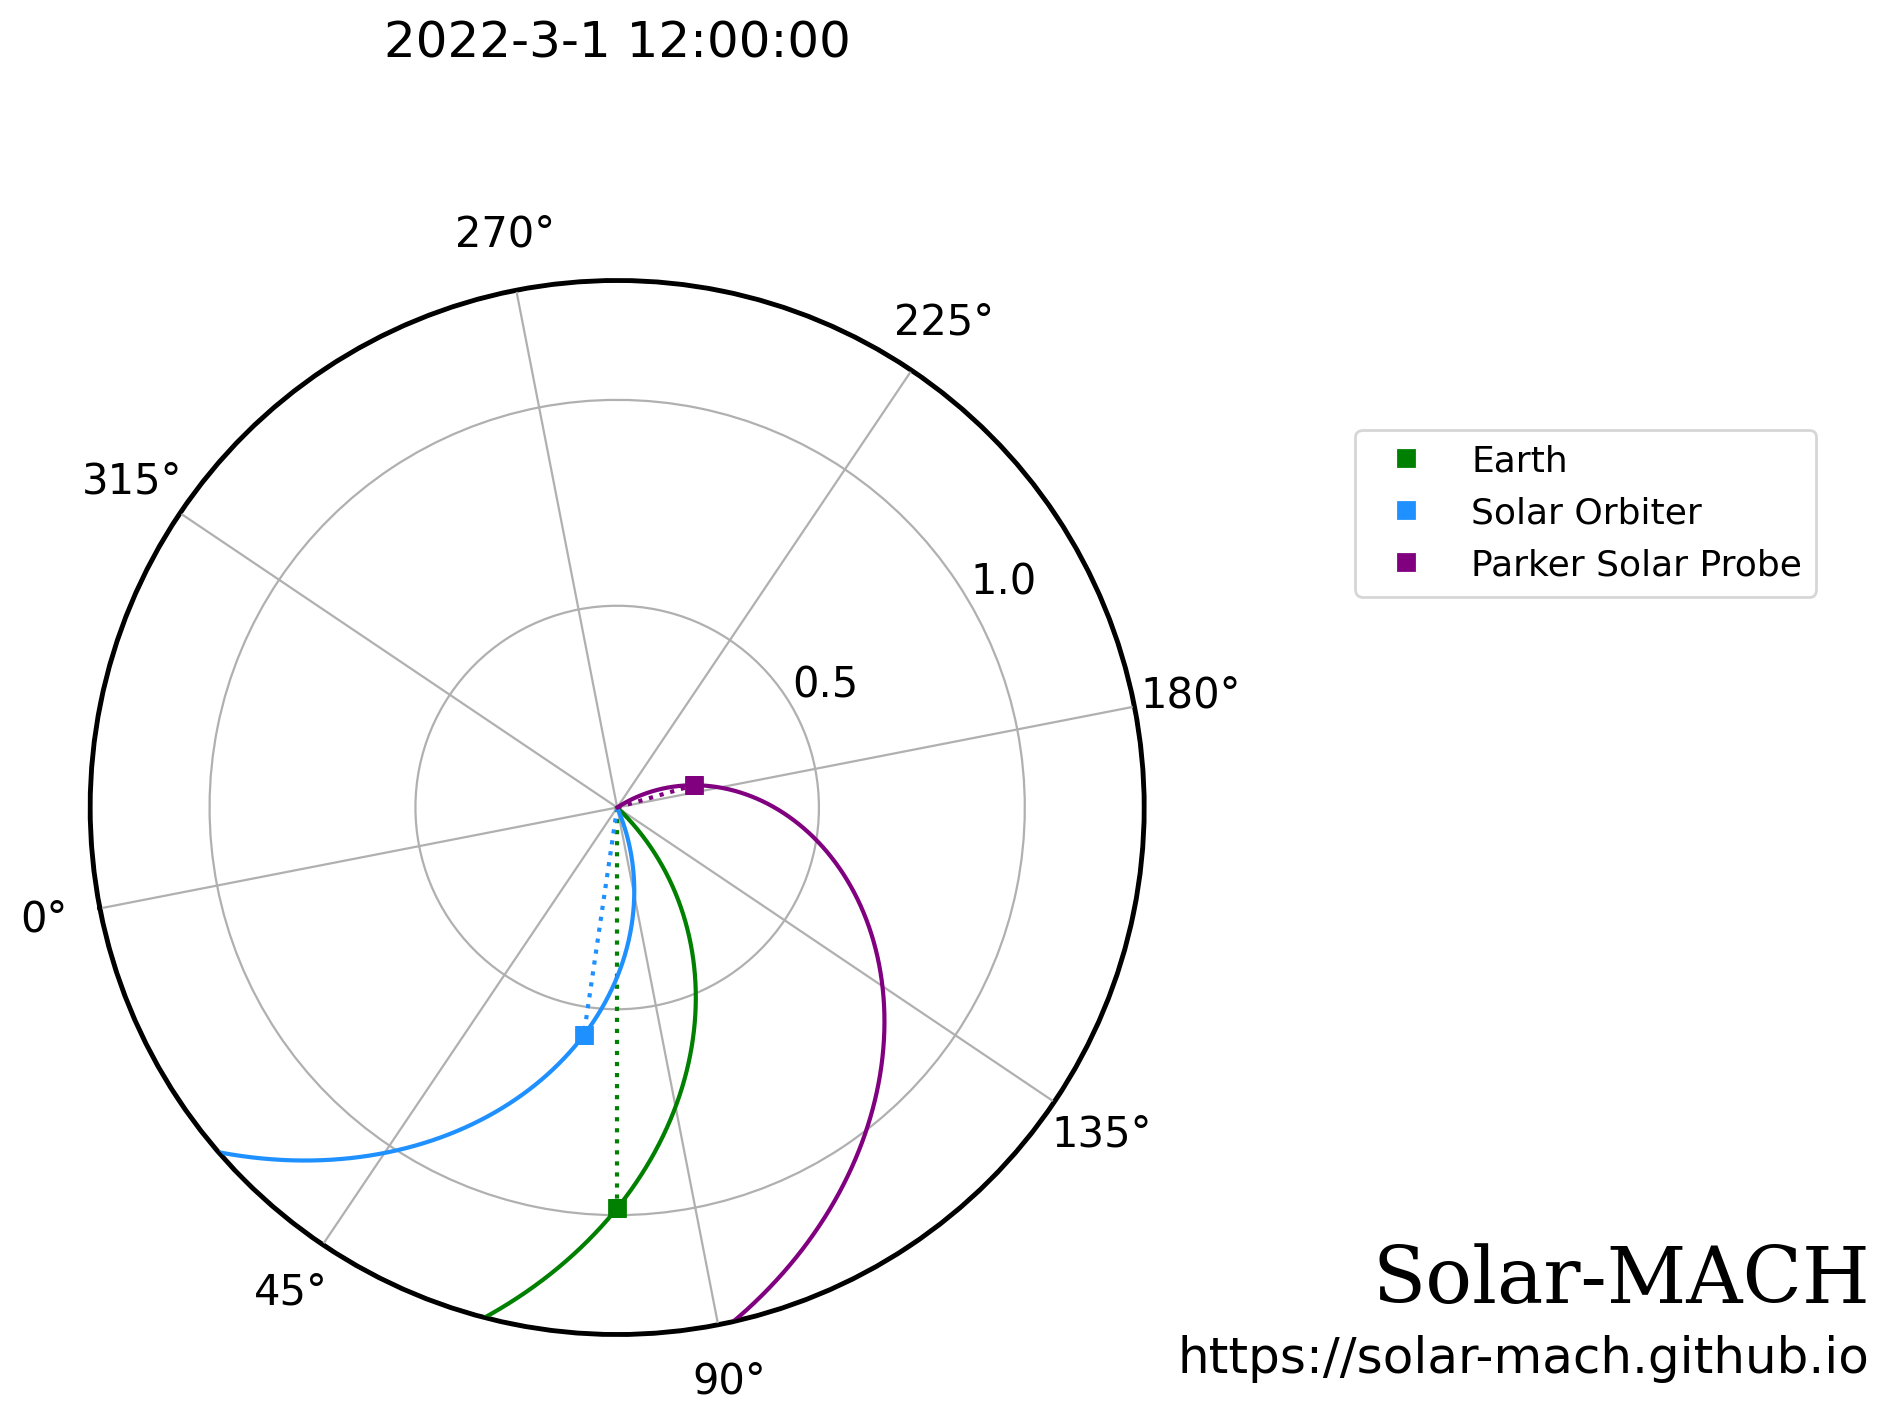

In [4]:
sm1.plot(plot_sun_body_line=True)

This plot shows a view from the top on the ecliptic plane with the Sun in the center and the Earth (indicated by green symbol) at "6 o'clock". The solid lines give estimations of single field lines of an ideal Parker heliospheric magnetic field connecting the corresponding observers to the Sun, while the dashed lines just indicate the line of sight from each of them to the Sun.

If you do not want or need that the solar wind speeds are obtained from online sources, you can manually define them with `vsw_list`. 
Note that each speed corresponds position-wise with the corresponding spacecraft/bodies list:

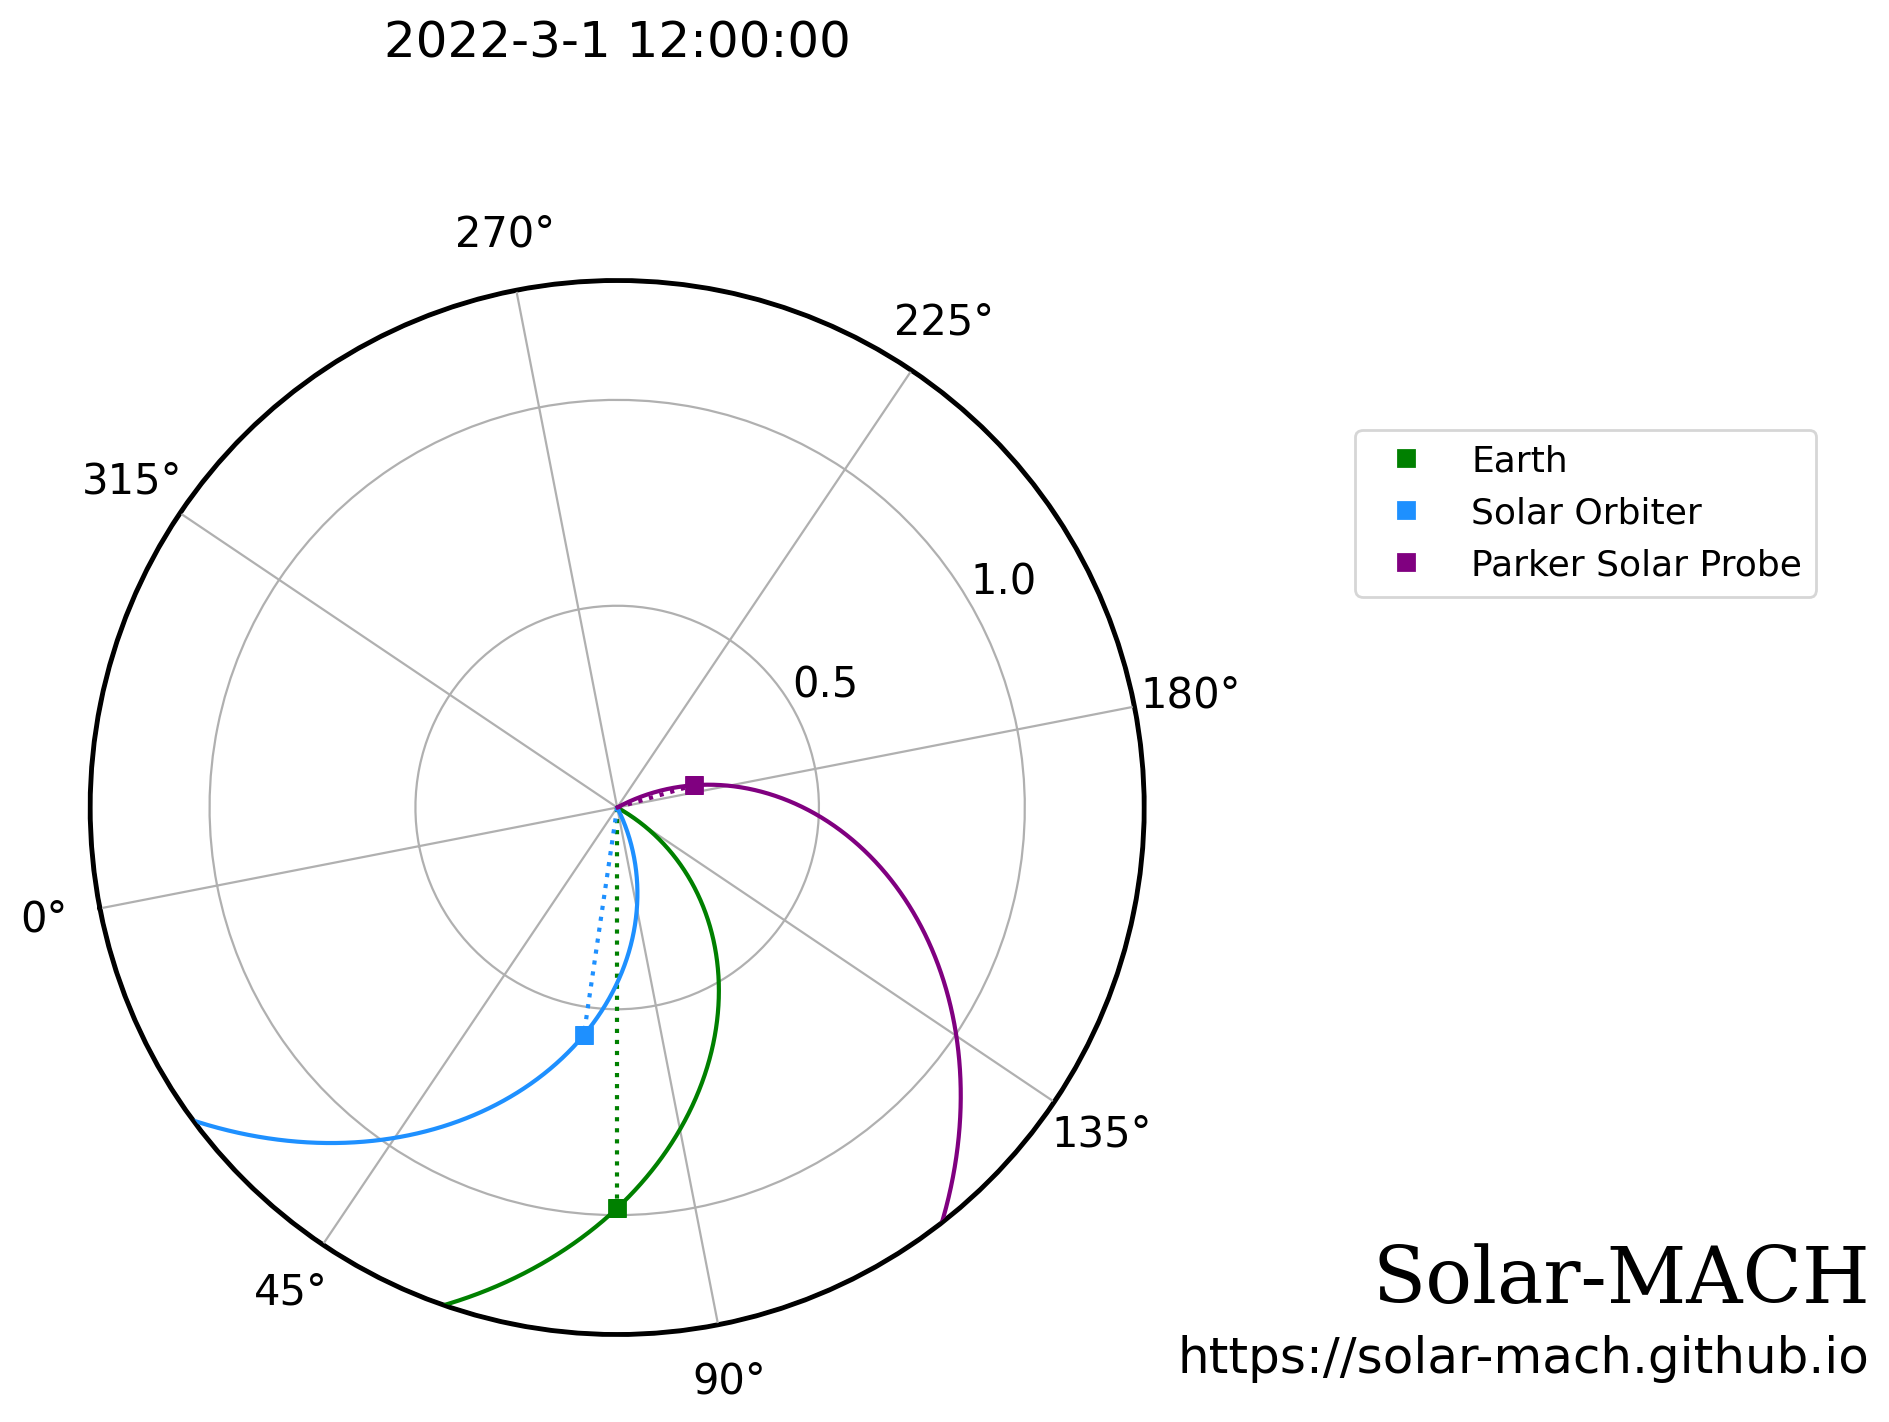

In [6]:
vsw_list = [400, 400, 400]    # position-sensitive solar wind speed per body in body_list
body_list = ['Earth', 'Solar Orbiter', 'PSP']
date = '2022-3-1 12:00:00'

sm1a = SolarMACH(date, body_list, vsw_list)
sm1a.plot(plot_sun_body_line=True)

---

## 2. Example with all the details <a class="anchor" id="Example_all_details"></a>

First, get a list of available bodies/spacecraft:

In [7]:
print(print_body_list().index)

Index(['Earth', 'ACE', 'BepiColombo', 'Cassini', 'JUICE', 'Juno', 'Jupiter',
       'L1', 'Mars', 'Mars Express', 'MAVEN', 'Mercury', 'MESSENGER', 'PSP',
       'Pioneer10', 'Pioneer11', 'Rosetta', 'SOHO', 'Solar Orbiter',
       'STEREO B', 'STEREO A', 'Ulysses', 'Venus', 'Voyager1', 'Voyager2',
       'WIND'],
      dtype='object', name='Key')


Provide the necessary options, this time for more spacecraft:

In [2]:
body_list = ['Mercury', 'Venus', 'Earth', 'Mars', 'STEREO A', 'STEREO B', 'Solar Orbiter', 'PSP', 'BepiColombo']
date = '2021-6-1 12:00:00'

Leave the position-sensitive solar wind speed list empty, so that they are obtained from actual measurements, and define the solar wind speed that should be used if no measurements can be obtained for a spacecraft:

In [3]:
vsw_list = []
default_vsw = 350  # km/s

The default coordinate system is [Carrington coordinates](https://docs.sunpy.org/en/stable/generated/api/sunpy.coordinates.frames.HeliographicCarrington.html), alternatively one could select the Earth-centered [Stonyhurst coordinate](https://docs.sunpy.org/en/stable/generated/api/sunpy.coordinates.frames.HeliographicStonyhurst.html) system:

In [4]:
coord_sys = 'Carrington'     # 'Carrington' (default) or 'Stoneyhurst'

Now we also want to indicate the position and direction of a flare, and the (assumed) solar wind speed at its location:

In [5]:
reference_long = 0            # Carrington longitude of reference (None to omit)
reference_lat = 0             # Carrington latitude of reference (None to omit)
reference_vsw = 400           # define solar wind speed at reference in km/s

In addition, we explicitly provide all availabe plotting options:

In [6]:
plot_spirals = True           # plot Parker spirals for each body
plot_sun_body_line = False    # plot straight line between Sun and body
long_offset = 0               # longitudinal offset for polar plot; defines where Earth's longitude is (by default 270, i.e., at "6 o'clock")
transparent = False           # make output figure background transparent
markers = 'numbers'           # use 'numbers' or 'letters' for the body markers (use False for colored squares)
filename = f'Solar-MACH_{date.replace(" ", "_")}.png'  # define filename of output figure

Finally, initializing and plotting with these options. If `outfile` is provided, the plot will be saved next to the Notebook with the provided `filename`.

You are requesting vpbulk_stb outside of its definition range <DateTimeRange: 2007-03-01T00:00:12+00:00 -> 2014-10-31T23:59:30+00:00>


No solar wind speeds defined, trying to obtain measurements...
Body 'Mercury' not supported, assuming default Vsw value of 350 km/s.
Body 'Venus' not supported, assuming default Vsw value of 350 km/s.
Using 'ACE' measurements for 'Earth'.
Body 'Mars' not supported, assuming default Vsw value of 350 km/s.
No Vsw data found for 'STEREO B' on 2021-06-01 12:00:00, assuming default Vsw value of 350 km/s.
No Vsw data found for 'Solar Orbiter' on 2021-06-01 12:00:00, assuming default Vsw value of 350 km/s.
Body 'BepiColombo' not supported, assuming default Vsw value of 350 km/s.


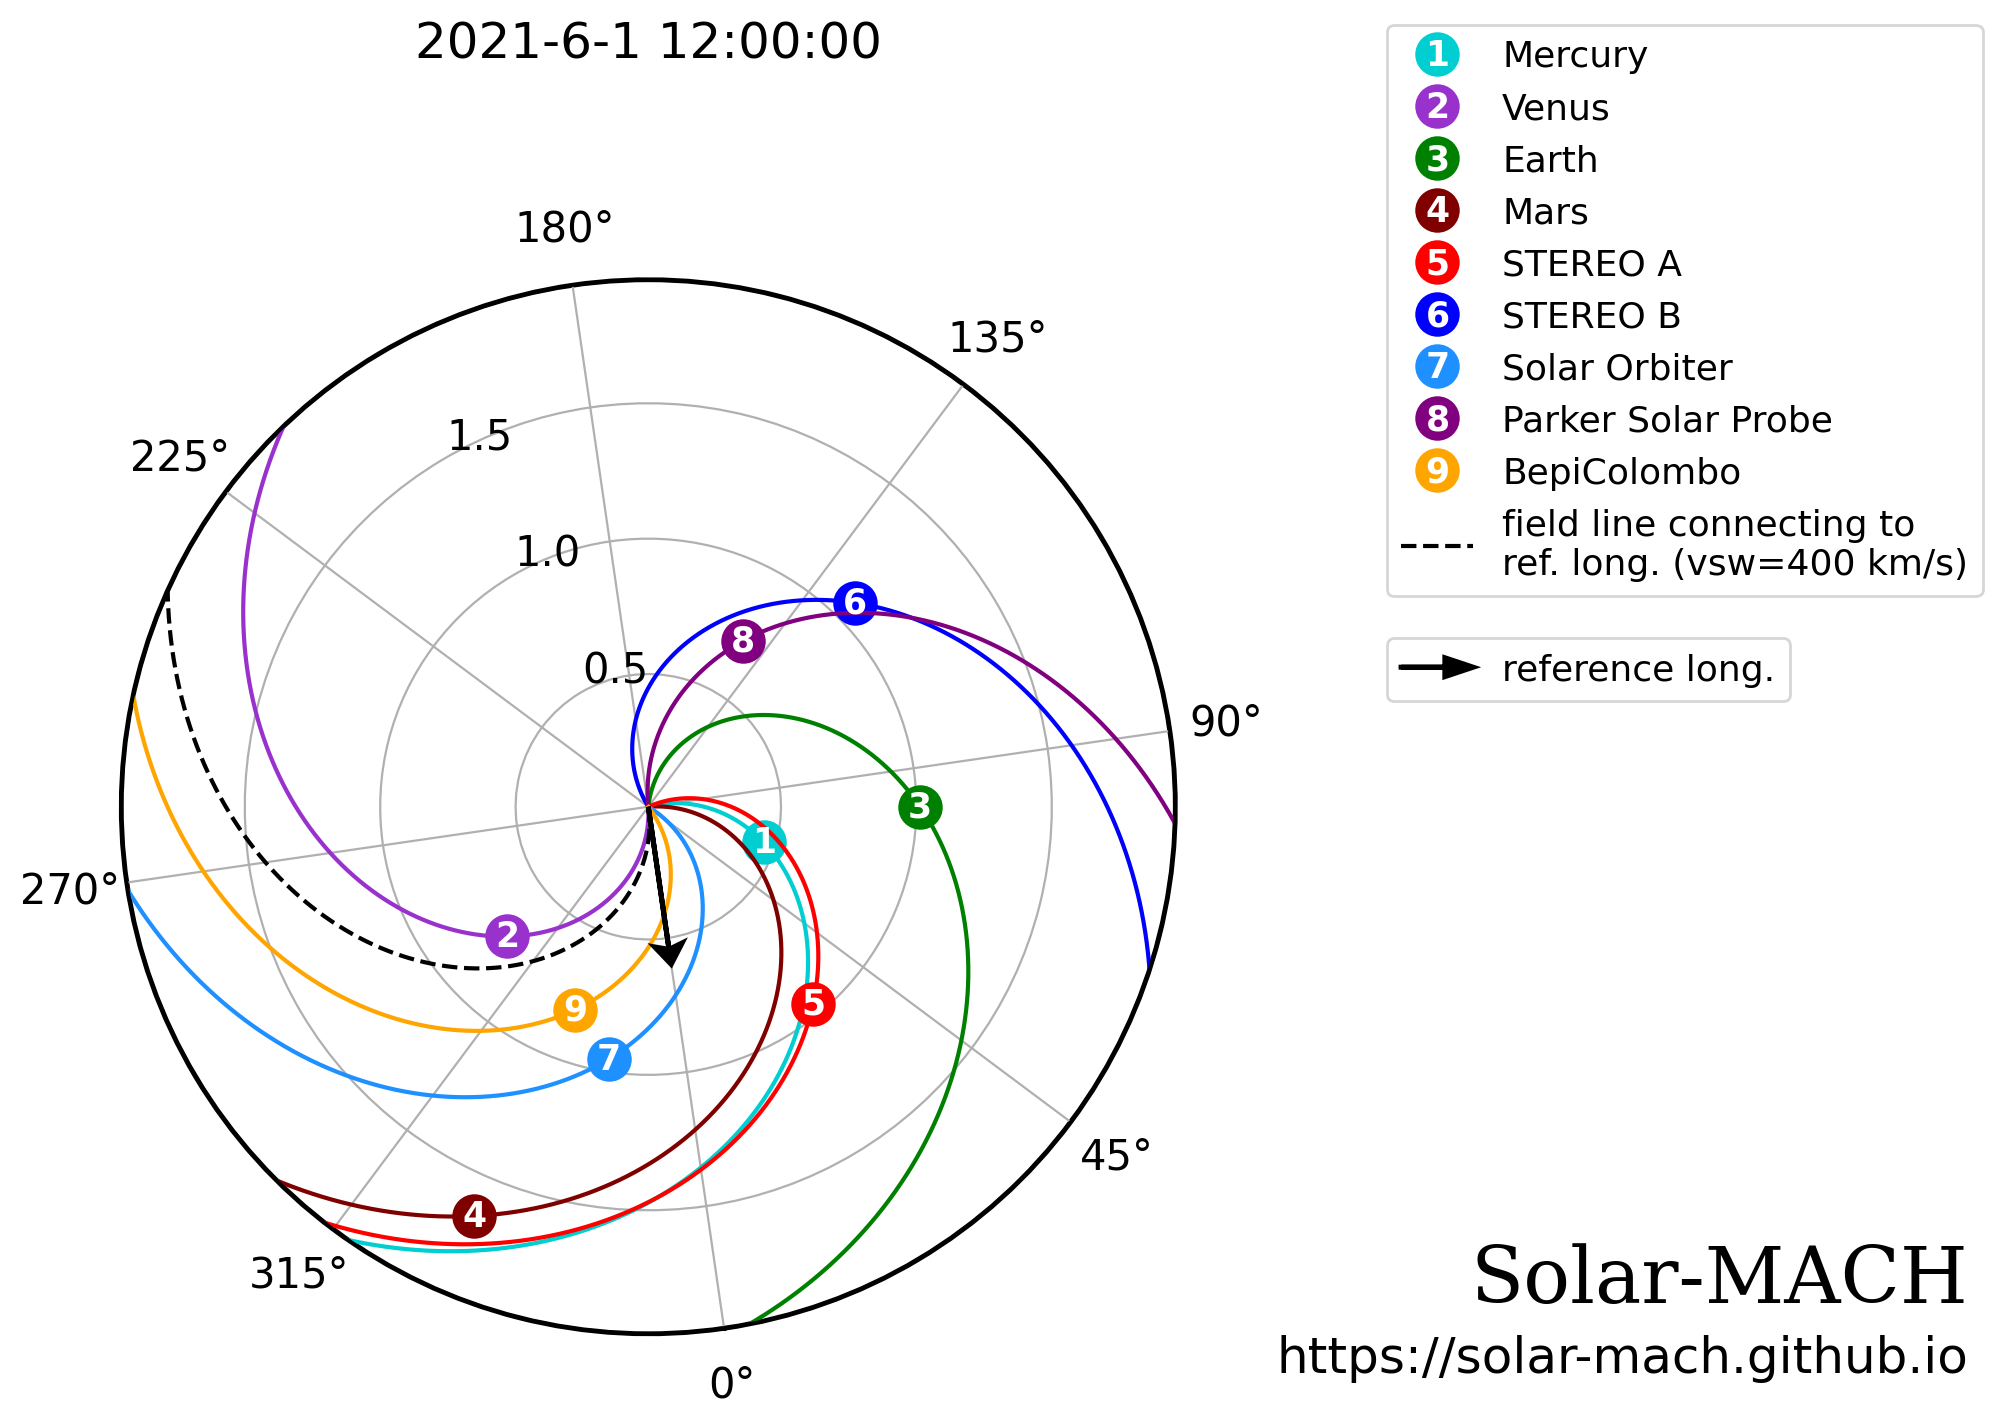

In [7]:
sm2 = SolarMACH(date, body_list, vsw_list, reference_long, reference_lat, coord_sys, default_vsw)

sm2.plot(plot_spirals=plot_spirals,
         plot_sun_body_line=plot_sun_body_line,
         long_offset=long_offset,
         reference_vsw=reference_vsw,
         transparent=transparent,
         markers=markers,
         outfile=filename
         )

All the data can also be obtained as a Pandas DataFrame for further use. Note that here you can also see the actually measured solar wind speeds at some spacecraft (`Vsw`):

In [9]:
df = sm2.coord_table
display(df)

Spacecraft/Body  Carrington longitude (°)  Carrington latitude (°)  \
0         Mercury                 64.572366                -3.374752   
1           Venus                304.308841                -2.405230   
2           Earth                 81.733394                -0.607576   
3            Mars                328.690673                -4.569037   
4        STEREO A                 31.671472                -5.969301   
5        STEREO B                126.320990                 4.463536   
6   Solar Orbiter                342.893742                -1.038420   
7             PSP                142.038810                 3.210198   
8     BepiColombo                331.970837                -3.538780   

   Heliocentric distance (AU)  Longitudinal separation to Earth's longitude  \
0                    0.456577                                    -17.161028   
1                    0.718663                                   -137.424553   
2                    1.014084                                      0.000000   
3                    1.657439                                   -113.042721   
4                    0.963303                                    -50.061921   
5                    1.085839                                     44.587597   
6                    0.952075                                    -98.839652   
7                    0.715577                                     60.305417   
8                    0.807266                                   -109.762557   

   Latitudinal separation to Earth's latitude         Vsw  \
0                                   -2.767176  350.000000   
1                                   -1.797654  350.000000   
2                                    0.000000  299.720001   
3                                   -3.961461  350.000000   
4                                   -5.361726  321.267857   
5                                    5.071112  350.000000   
6                                   -0.430845  350.000000   
7                                    3.817774  501.488275   
8                                   -2.931204  350.000000   

   Magnetic footpoint longitude (Carrington)  \
0                                  96.911462   
1                                 355.463238   
2                                 166.282213   
3                                  86.722920   
4                                 106.021566   
5                                 203.548635   
6                                  50.838628   
7                                 177.552209   
8                                  29.390736   

   Longitudinal separation between body and reference_long  \
0                                          64.572366         
1                                         -55.691159         
2                                          81.733394         
3                                         -31.309327         
4                                          31.671472         
5                                         126.320990         
6                                         -17.106258         
7                                         142.038810         
8                                         -28.029163         

   Longitudinal separation between body's mangetic footpoint and reference_long  \
0                                          96.911462                              
1                                          -4.536762                              
2                                         166.282213                              
3                                          86.722920                              
4                                         106.021566                              
5                                        -156.451365                              
6                                          50.838628                              
7                                         177.552209                              
8                             

In [10]:
df['Heliocentric distance (AU)'].values

array([0.45657717, 0.71866253, 1.0140839 , 1.65743876, 0.9633026 ,
       1.08583866, 0.95207518, 0.7155775 , 0.80726552])

---

## 3. Example using Stonyhurst coordinates for reference <a class="anchor" id="Example_stonyhurst"></a>

Let's take a look at the situation at the first ground-level enhancement (GLE) of solar cycle 25 on 28 October 2021 

First, we just provide some options as before:

In [2]:
body_list = ['STEREO-A', 'Earth', 'BepiColombo', 'PSP', 'Solar Orbiter', 'Mars']
vsw_list = [340, 300, 350, 350, 320, 350]        # position-sensitive solar wind speed per body in body_list
date = '2021-10-28 15:20:00'
coord_sys = 'Stoneyhurst'

# optional parameters
plot_spirals = True           # plot Parker spirals for each body
plot_sun_body_line = True     # plot straight line between Sun and body
transparent = False           # make output figure background transparent
markers = 'letters'           # use 'numbers' or 'letters' for the body markers (use False for colored squares)
filename = f'Solar-MACH_{date.replace(" ", "_")}.png'  # define filename of output figure

But now we want to provide the coordinates of the flare in [Stonyhurst coordinates](https://docs.sunpy.org/en/stable/generated/api/sunpy.coordinates.frames.HeliographicStonyhurst.html) (instead of [Carrington](https://docs.sunpy.org/en/stable/generated/api/sunpy.coordinates.frames.HeliographicCarrington.html)).

In [3]:
reference_long = 2            # Stonyhurst longitude of reference (None to omit)
reference_lat = 26            # Stonyhurst latitude of reference (None to omit)
reference_vsw = 300           # define solar wind speed at reference

Finally, initializing and plotting with these options:

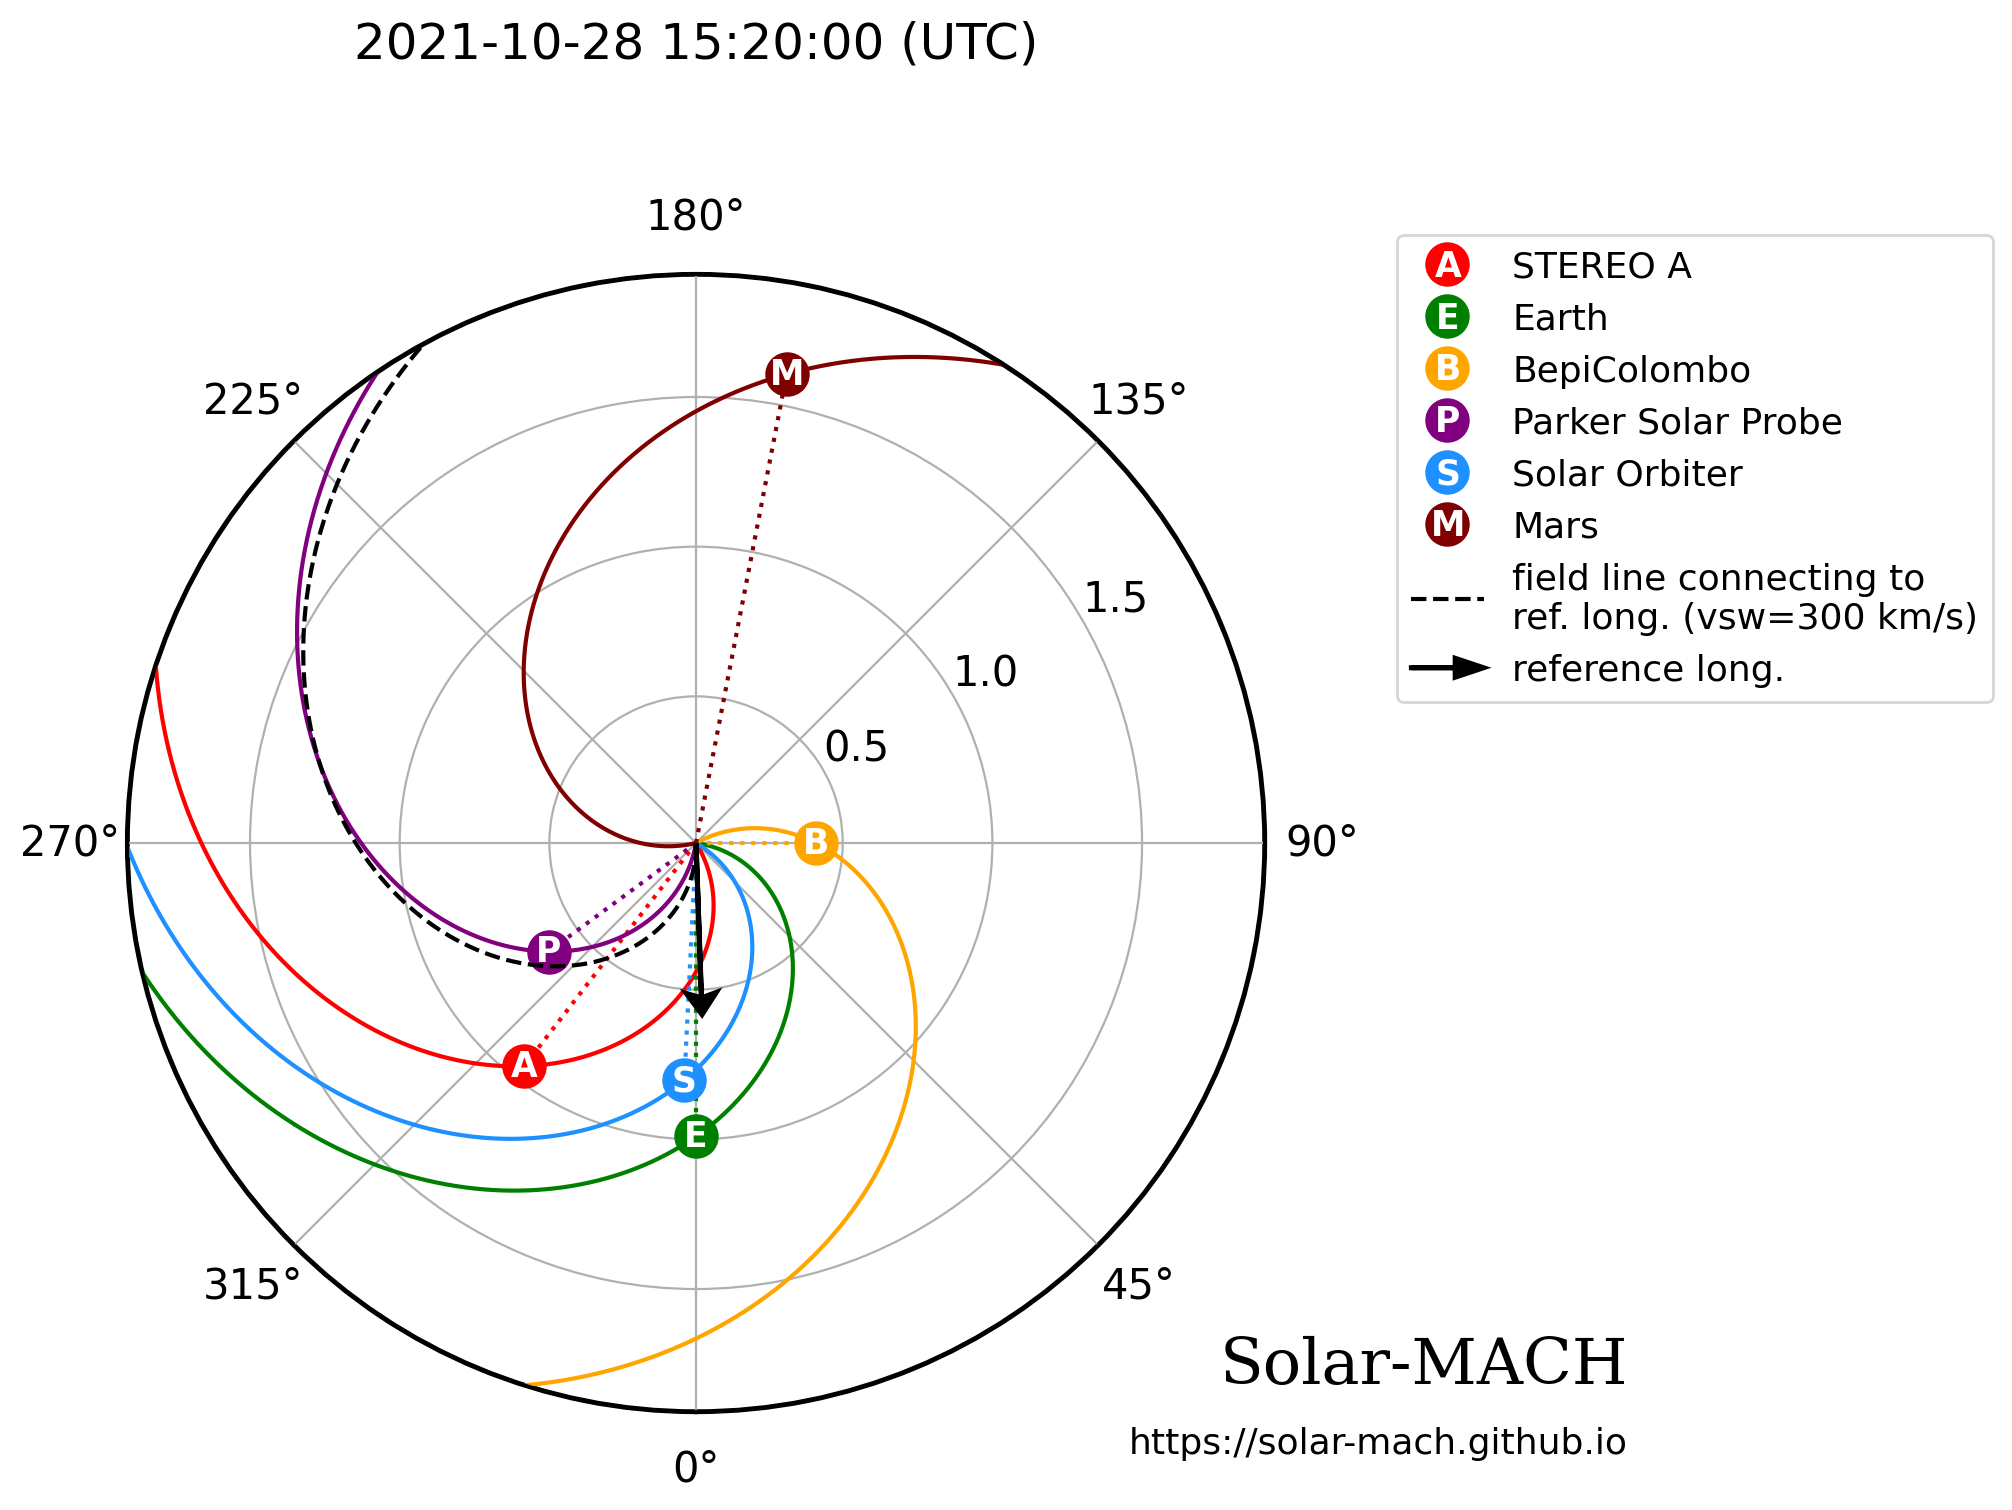

In [4]:
sm3 = SolarMACH(date, body_list, vsw_list, reference_long, reference_lat, coord_sys)
sm3.plot(plot_spirals=plot_spirals,
         plot_sun_body_line=plot_sun_body_line,
         reference_vsw=reference_vsw,
         transparent=transparent,
         markers=markers,
         outfile=filename
         )

---
## 4. Only obtain data as Pandas DataFrame <a class="anchor" id="only_dataframe"></a>

We can also just obtain a table with the spatial data, without producing a plot at all.

First provide necessary options:

In [13]:
body_list = ['STEREO-A', 'Earth', 'BepiColombo', 'PSP', 'Solar Orbiter', 'Mars']
vsw_list = []  # leave empty to obtain measurements
date = '2022-3-1 12:00:00'

Then initialize `SolarMACH` and obtain data as Pandas DataFrame:

In [14]:
sm4 = SolarMACH(date, body_list, vsw_list)
df = sm4.coord_table
display(df)

No solar wind speeds defined, trying to obtain measurements...
Using 'ACE' measurements for 'Earth'.
Body 'BepiColombo' not supported, assuming default Vsw value of 400.0 km/s.
Body 'Mars' not supported, assuming default Vsw value of 400.0 km/s.


Spacecraft/Body  Carrington longitude (°)  Carrington latitude (°)  \
0        STEREO-A                 44.772913                -5.741163   
1           Earth                 78.960205                -7.222304   
2     BepiColombo                  3.679356                 2.294885   
3             PSP                185.175551                 0.771163   
4   Solar Orbiter                 70.614031                -4.042220   
5            Mars                186.262634                 0.369636   

   Heliocentric distance (AU)  Longitudinal separation to Earth's longitude  \
0                    0.967315                                    -34.187292   
1                    0.990840                                      0.000000   
2                    0.342656                                    -75.280849   
3                    0.203645                                    106.215346   
4                    0.570316                                     -8.346174   
5                    1.460183                                    107.302429   

   Latitudinal separation to Earth's latitude         Vsw  \
0                                    1.481141  474.333333   
1                                    0.000000  527.239990   
2                                    9.517189  400.000000   
3                                    7.993467  291.739344   
4                                    3.180084  443.230915   
5                                    7.591940  400.000000   

   Magnetic footpoint longitude (Carrington)  
0                                  95.370053  
1                                 125.402266  
2                                  24.870641  
3                                 202.298232  
4                                 102.544135  
5                                 277.616908

If we also provide the `reference` information, it will be available in the table, too:

In [15]:
sm4 = SolarMACH(date, body_list, vsw_list, reference_long=273, reference_lat=7)
df = sm4.coord_table
display(df)

No solar wind speeds defined, trying to obtain measurements...
Using 'ACE' measurements for 'Earth'.
Body 'BepiColombo' not supported, assuming default Vsw value of 400.0 km/s.
Body 'Mars' not supported, assuming default Vsw value of 400.0 km/s.


Spacecraft/Body  Carrington longitude (°)  Carrington latitude (°)  \
0        STEREO-A                 44.772913                -5.741163   
1           Earth                 78.960205                -7.222304   
2     BepiColombo                  3.679356                 2.294885   
3             PSP                185.175551                 0.771163   
4   Solar Orbiter                 70.614031                -4.042220   
5            Mars                186.262634                 0.369636   

   Heliocentric distance (AU)  Longitudinal separation to Earth's longitude  \
0                    0.967315                                    -34.187292   
1                    0.990840                                      0.000000   
2                    0.342656                                    -75.280849   
3                    0.203645                                    106.215346   
4                    0.570316                                     -8.346174   
5                    1.460183                                    107.302429   

   Latitudinal separation to Earth's latitude         Vsw  \
0                                    1.481141  474.333333   
1                                    0.000000  527.239990   
2                                    9.517189  400.000000   
3                                    7.993467  291.739344   
4                                    3.180084  443.230915   
5                                    7.591940  400.000000   

   Magnetic footpoint longitude (Carrington)  \
0                                  95.370053   
1                                 125.402266   
2                                  24.870641   
3                                 202.298232   
4                                 102.544135   
5                                 277.616908   

   Longitudinal separation between body and reference_long  \
0                                        -228.227087         
1                                        -194.039795         
2                                        -269.320644         
3                                         -87.824449         
4                                        -202.385969         
5                                         -86.737366         

   Longitudinal separation between body's mangetic footpoint and reference_long  \
0                                        -177.629947                              
1                                        -147.597734                              
2                                         111.870641                              
3                                         -70.701768                              
4                                        -170.455865                              
5                                           4.616908                              

   Latitudinal separation between body and reference_lat  
0                                         -12.741163      
1                                         -14.222304      
2                                          -4.705115      
3                                          -6.228837      
4                                         -11.042220      
5                                          -6.630364

Note again that by default all coordinates are given in Carrington coordinates (as indicated in the column titles). To have this data in Stoneyhurst coordinates, define the `coord_sys` when initilizing `SolarMACH`:

In [16]:
sm4a = SolarMACH(date, body_list, vsw_list, coord_sys='Stoneyhurst')
df = sm4a.coord_table
display(df)

No solar wind speeds defined, trying to obtain measurements...
Using 'ACE' measurements for 'Earth'.
Body 'BepiColombo' not supported, assuming default Vsw value of 400.0 km/s.
Body 'Mars' not supported, assuming default Vsw value of 400.0 km/s.


Spacecraft/Body  Stonyhurst longitude (°)  Stonyhurst latitude (°)  \
0        STEREO-A             -3.418729e+01                -5.741163   
1           Earth             -9.587279e-08                -7.222304   
2     BepiColombo             -7.528085e+01                 2.294885   
3             PSP              1.062153e+02                 0.771163   
4   Solar Orbiter             -8.346174e+00                -4.042220   
5            Mars              1.073024e+02                 0.369636   

   Heliocentric distance (AU)  Longitudinal separation to Earth's longitude  \
0                    0.967315                                    -34.187292   
1                    0.990840                                      0.000000   
2                    0.342656                                    -75.280849   
3                    0.203645                                    106.215346   
4                    0.570316                                     -8.346174   
5                    1.460183                                    107.302429   

   Latitudinal separation to Earth's latitude         Vsw  \
0                                    1.481141  474.333333   
1                                    0.000000  527.239990   
2                                    9.517189  400.000000   
3                                    7.993467  291.739344   
4                                    3.180084  443.230915   
5                                    7.591940  400.000000   

   Magnetic footpoint longitude (Stonyhurst)  
0                                  16.409848  
1                                  46.442061  
2                                 -54.089564  
3                                 123.338027  
4                                  23.583930  
5                                 198.656703

---
## 5. Advanced plotting options <a class="anchor" id="plotting_options"></a>

Since version 0.1.6, `solarmach` provides the option to color a cone-shaped area or an area between two Parker spirals in the heliographic plane. For this, `SolarMACH.plot()` has three new options:

- **long_sector**: list of 2 numbers: start and stop longitude of a shaded area; e.g. `[350, 20]` to get a cone from 350 to 20 degree longitude (for long_sector_vsw=None`).
- **long_sector_vsw**: list of 2 numbers: Solar wind speed used to calculate Parker spirals (at start and stop longitude provided by `long_sector`) between which a reference cone should be drawn; e.g. `[400, 400]` to assume for both edges of the fill area a Parker spiral produced by solar wind speeds of 400 km/s. If `None`, instead of Parker spirals, straight lines are used, i.e. a simple cone will be plotted. By default, `None`.
- **long_sector_color**: String defining the matplotlib color used for the shading defined by `long_sector`. By default, `'red'`.

In addition, it is now possible to plot a set of evenly distributed Parker spirals in the background, see [5.3 Example 3: plot background Parker spirals](#5.3-Example-3:-plot-background-Parker-spirals).

### 5.1 Example 1: plot cone-shaped area

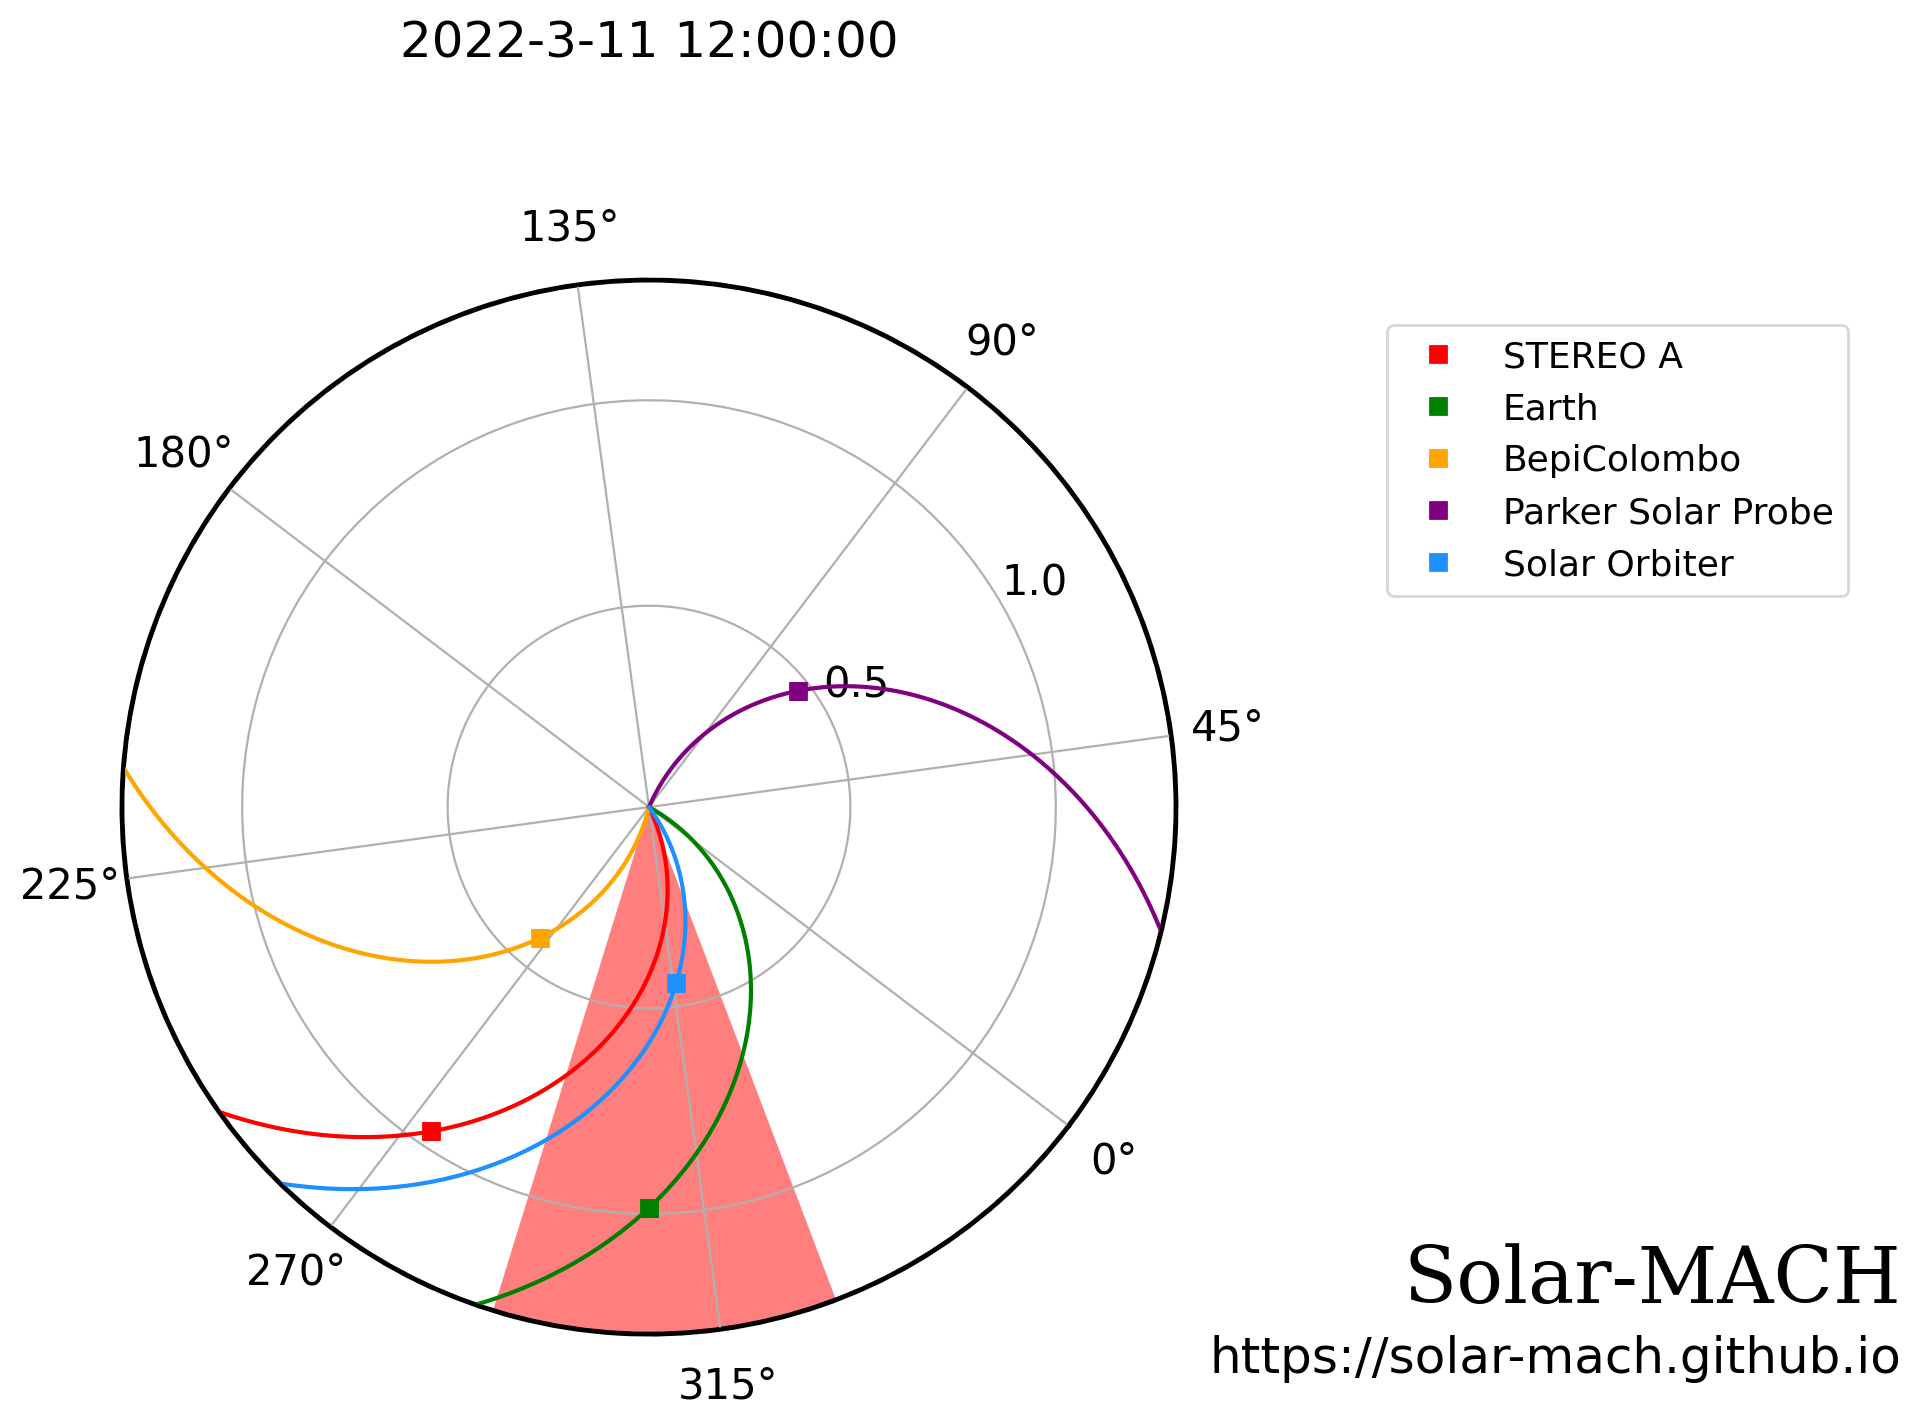

In [ ]:
body_list = ['STEREO-A', 'Earth', 'BepiColombo', 'PSP', 'Solar Orbiter']
vsw_list = [400, 400, 400, 400, 400]
date = '2022-3-11 12:00:00'

sm5a = SolarMACH(date, body_list, vsw_list)
sm5a.plot(long_sector=[290, 328], long_sector_vsw=None, long_sector_color='red')

### 5.2 Example 2: shade area between two Parker spirals

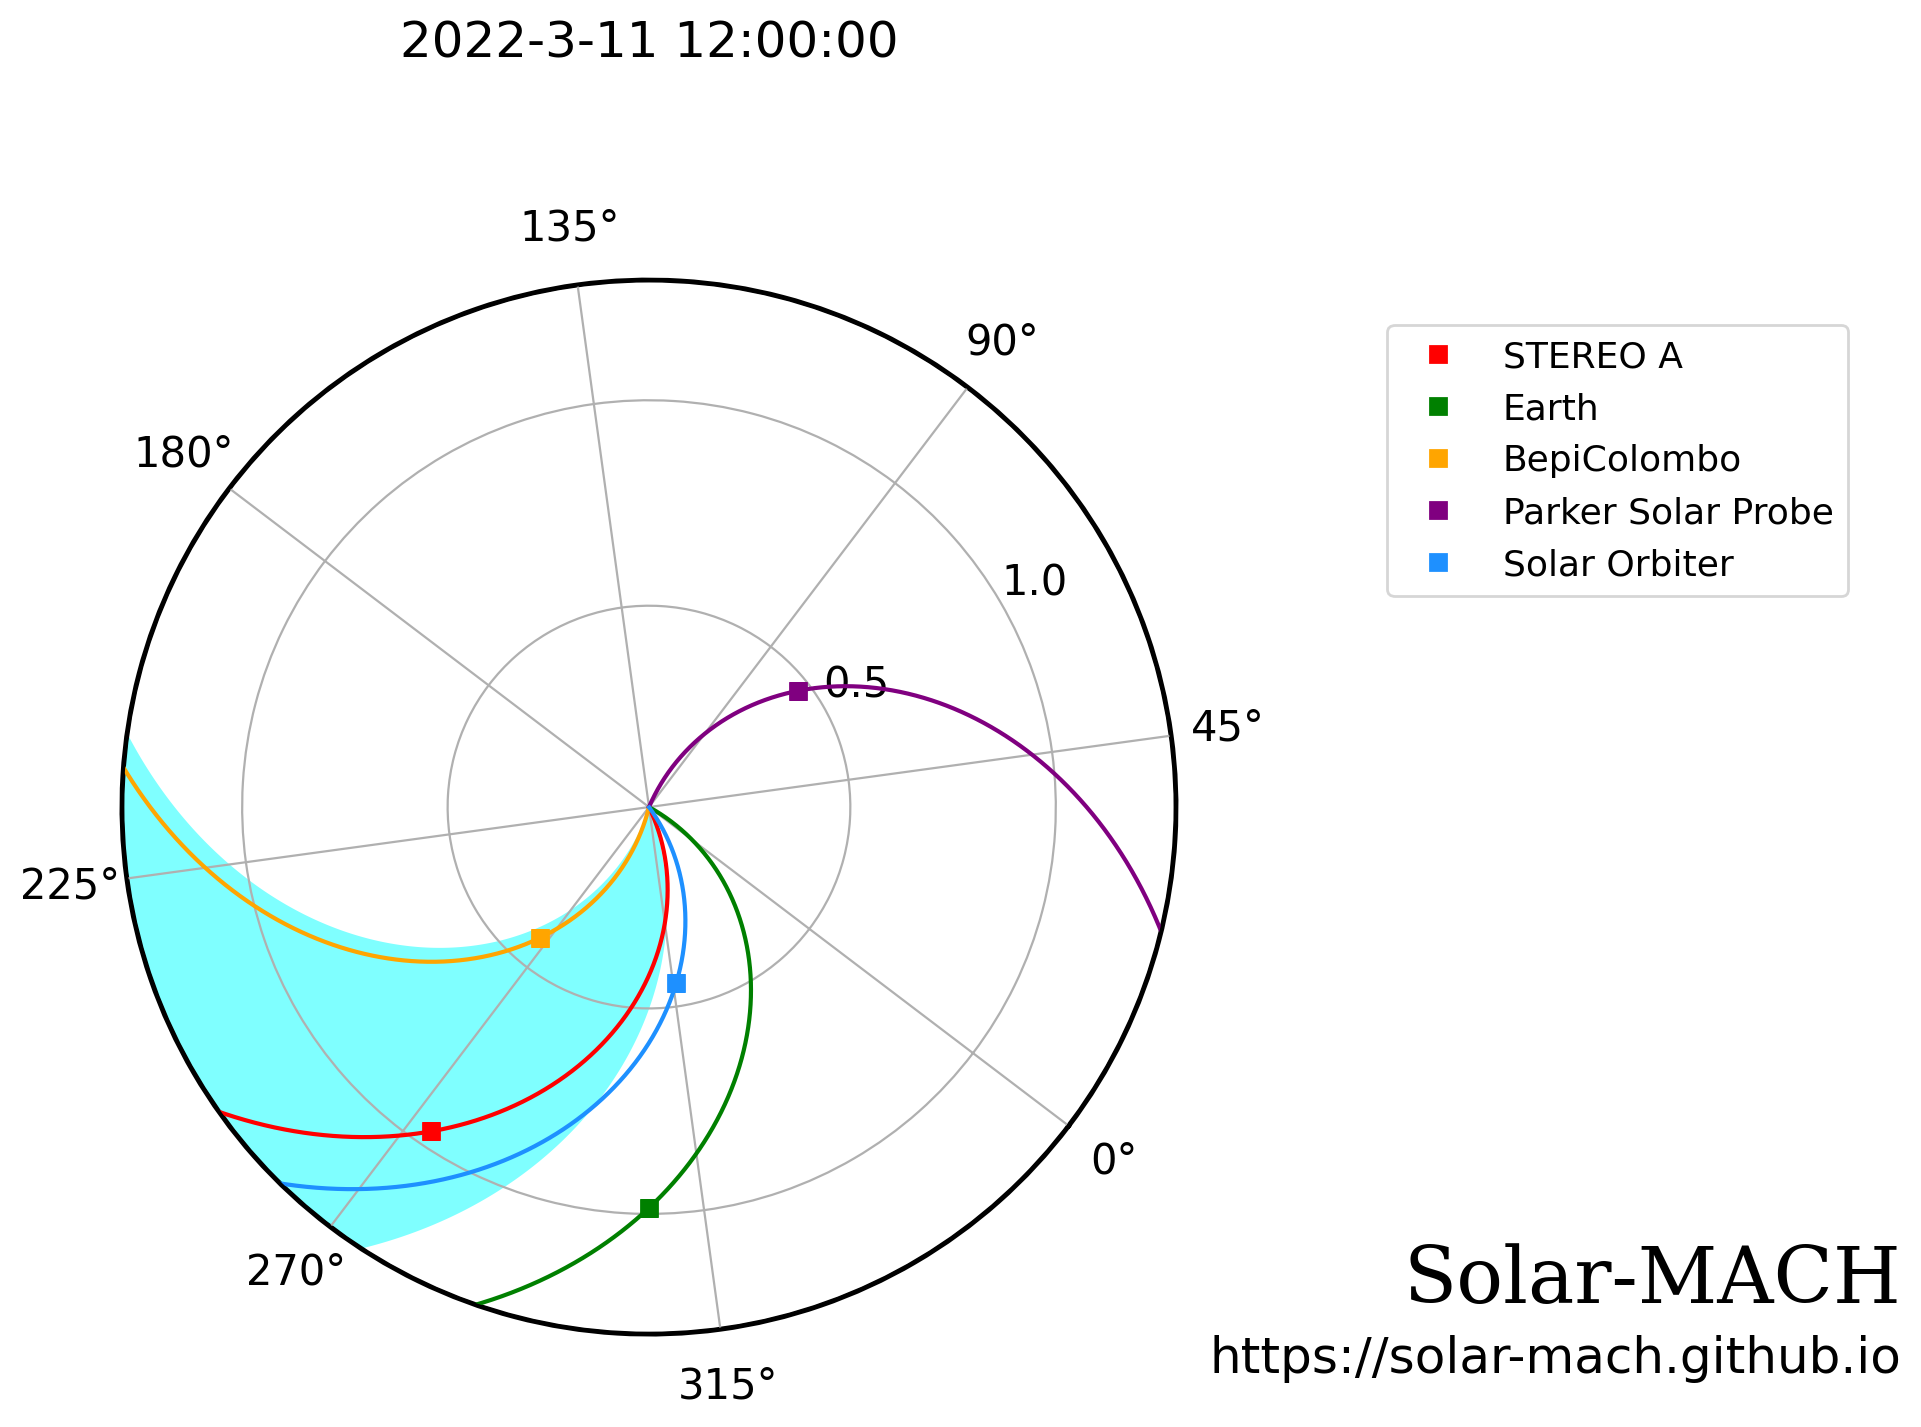

In [ ]:
body_list = ['STEREO-A', 'Earth', 'BepiColombo', 'PSP', 'Solar Orbiter']
vsw_list = [400, 400, 400, 400, 400]
date = '2022-3-11 12:00:00'

sm5b = SolarMACH(date, body_list, vsw_list)
sm5b.plot(long_sector=[290, 328], long_sector_vsw=[400,600], long_sector_color='cyan')

Note that there still is a bug if the speeds in `long_sector_vsw` differ to some extent; then the plotting might not work as intended.

### 5.3 Example 3: plot background Parker spirals

Since version 0.1.6, `solarmach` provides the option to plot a set of evenly distributed Parker spirals in the background, using the option `background_spirals` in `SolarMACH.plot()`:

**background_spirals**: list of 2 numbers (and 3 optional strings). If defined, plot evenly distributed Parker spirals over 360°. `background_spirals[0]` defines the number of spirals, `background_spirals[1]` the solar wind speed in km/s used for their calculation. 

Optionally, `background_spirals[2]`, `background_spirals[3]`, and `background_spirals[4]` change the plotting line style, color, and alpha setting, respectively (default values `':'`, `'grey'`, and `0.1`). 

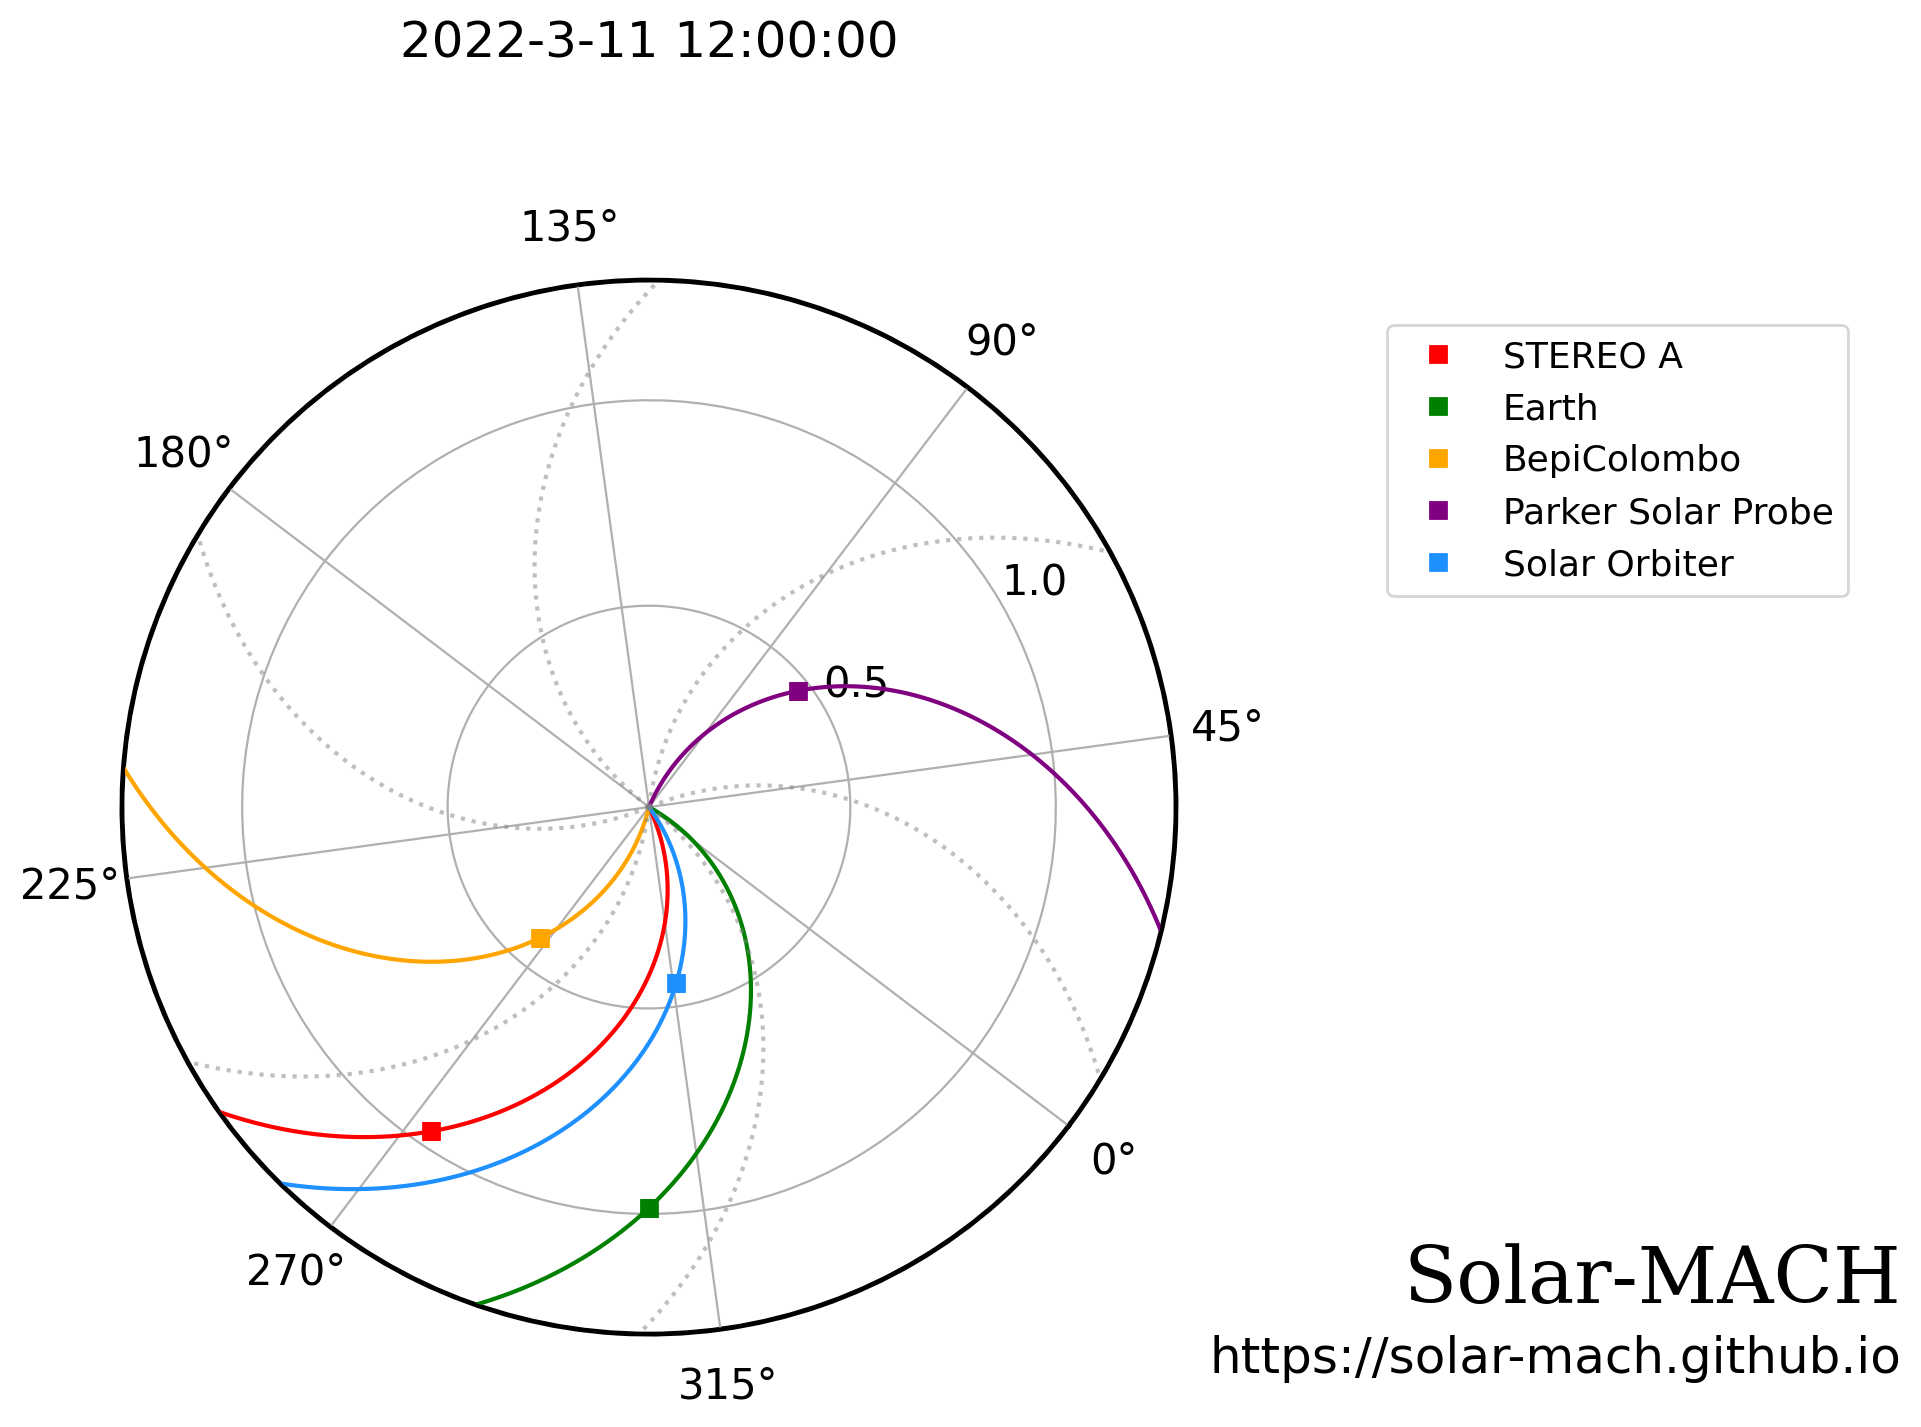

In [ ]:
body_list = ['STEREO-A', 'Earth', 'BepiColombo', 'PSP', 'Solar Orbiter']
vsw_list = [400, 400, 400, 400, 400]
date = '2022-3-11 12:00:00'

sm = SolarMACH(date, body_list, vsw_list)
sm.plot(background_spirals=[6, 600])

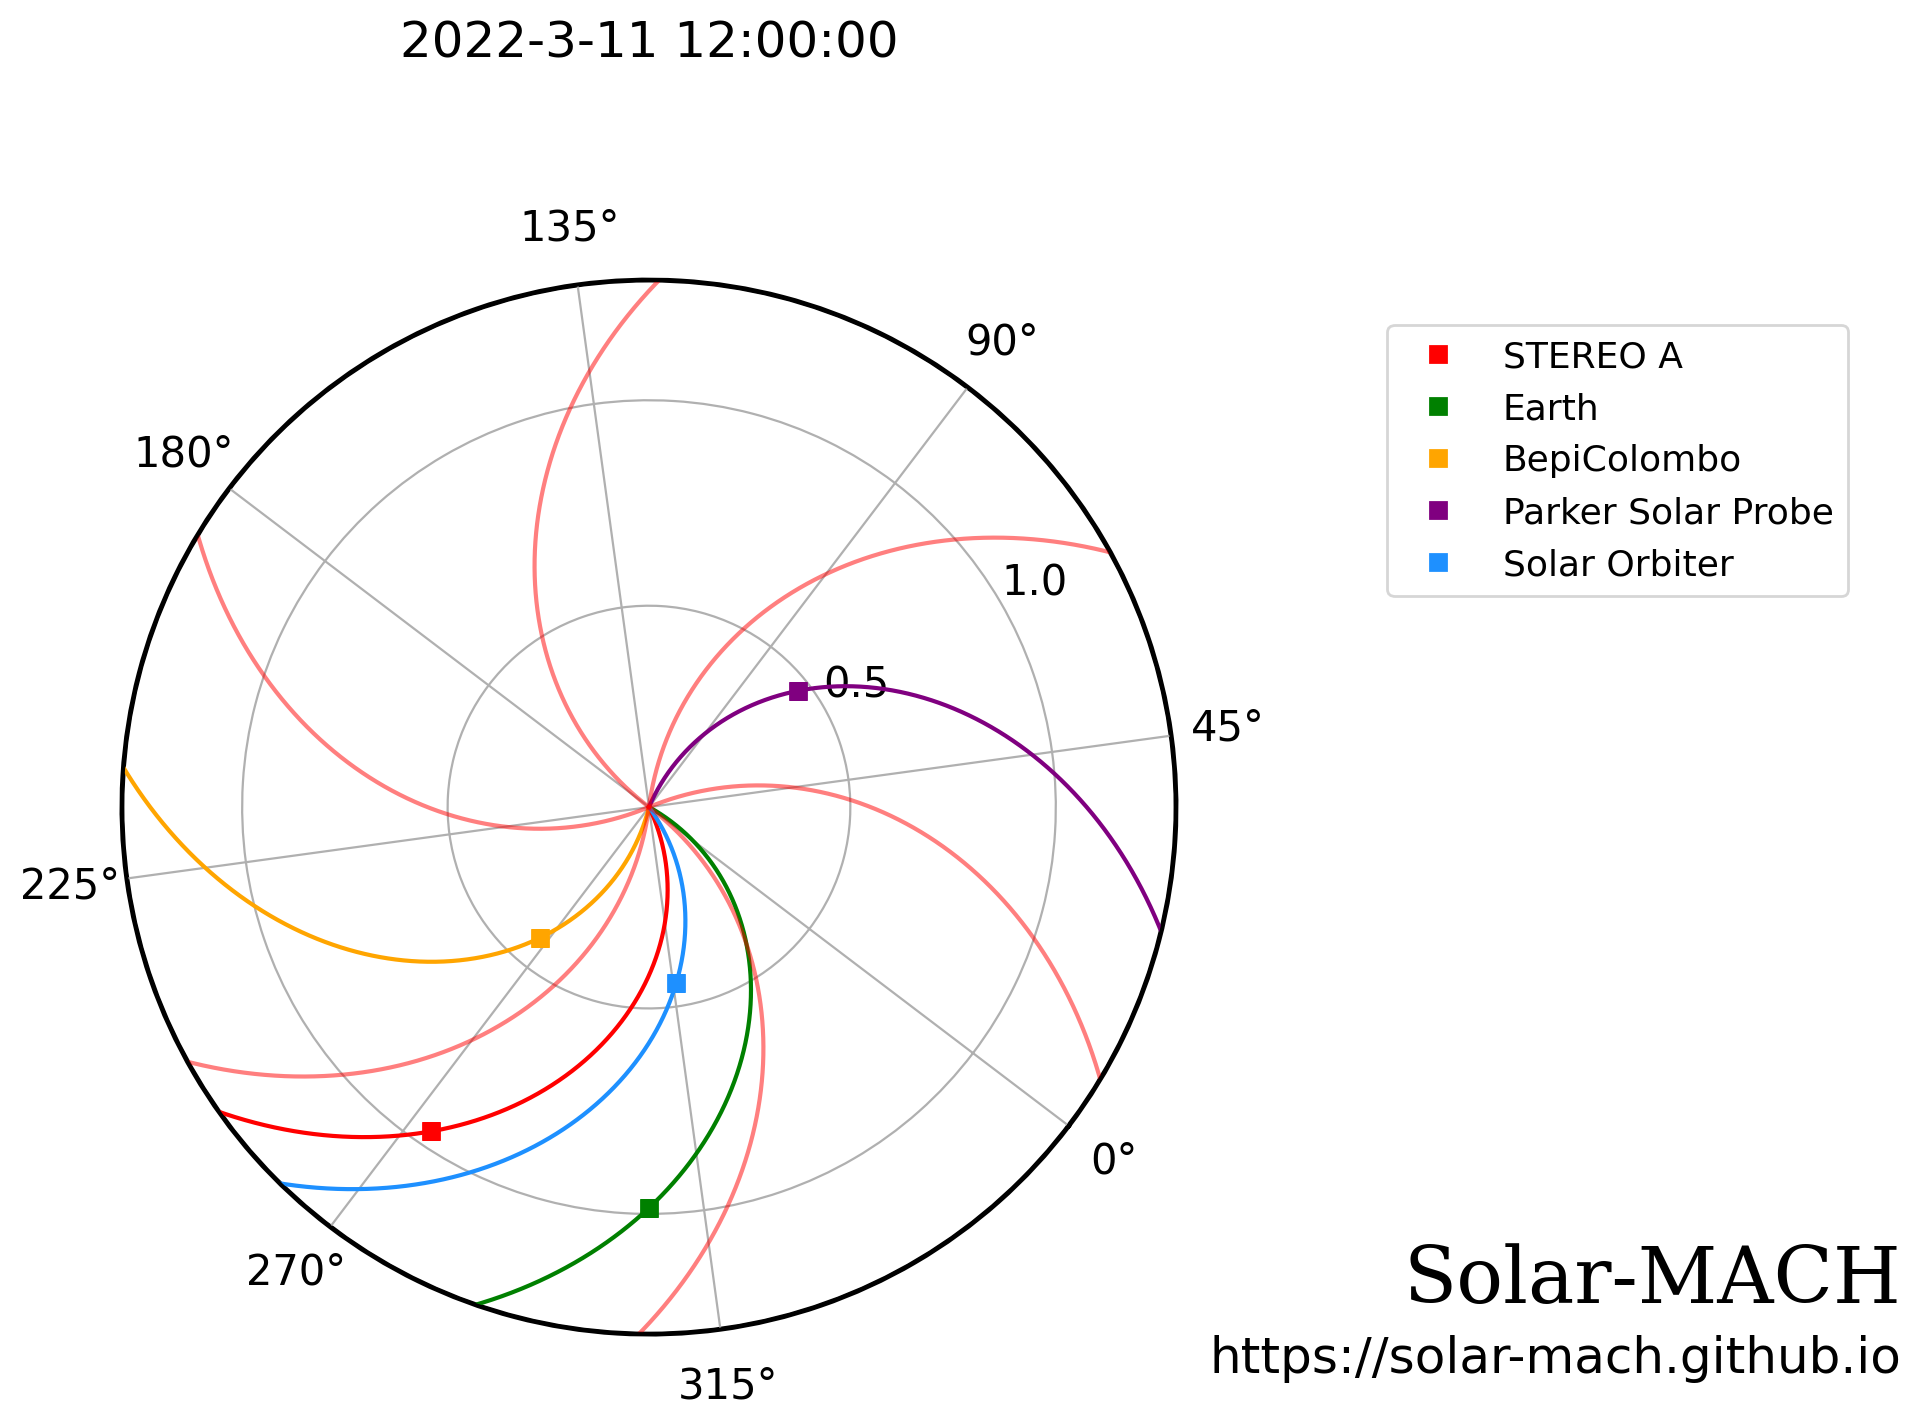

In [ ]:
body_list = ['STEREO-A', 'Earth', 'BepiColombo', 'PSP', 'Solar Orbiter']
vsw_list = [400, 400, 400, 400, 400]
date = '2022-3-11 12:00:00'

sm = SolarMACH(date, body_list, vsw_list)
sm.plot(background_spirals=[6, 600, '-', 'red', 0.5])

---
## 6. Advanced: edit the figure <a class="anchor" id="edit_figure"></a>
Let's produce again the figure for the Oct 2021 GLE event.

In [74]:
body_list = ['STEREO-A', 'Earth', 'BepiColombo', 'PSP', 'Solar Orbiter', 'Mars']
vsw_list = [340, 300, 350, 350, 320, 350]  # position-sensitive solar wind speed per body in body_list
date = '2021-10-28 15:20:00'
reference_long = 130           # Carrington longitude of reference (None to omit)
reference_lat = 0             # Carrington latitude of reference (None to omit)
reference_vsw = 400           # define solar wind speed at reference
sm6 = SolarMACH(date, body_list, vsw_list, reference_long, reference_lat)

But now we prodive the option `return_plot_object=True` to the `plot()` call, so that the matplotlib figure and axis object will be returned:

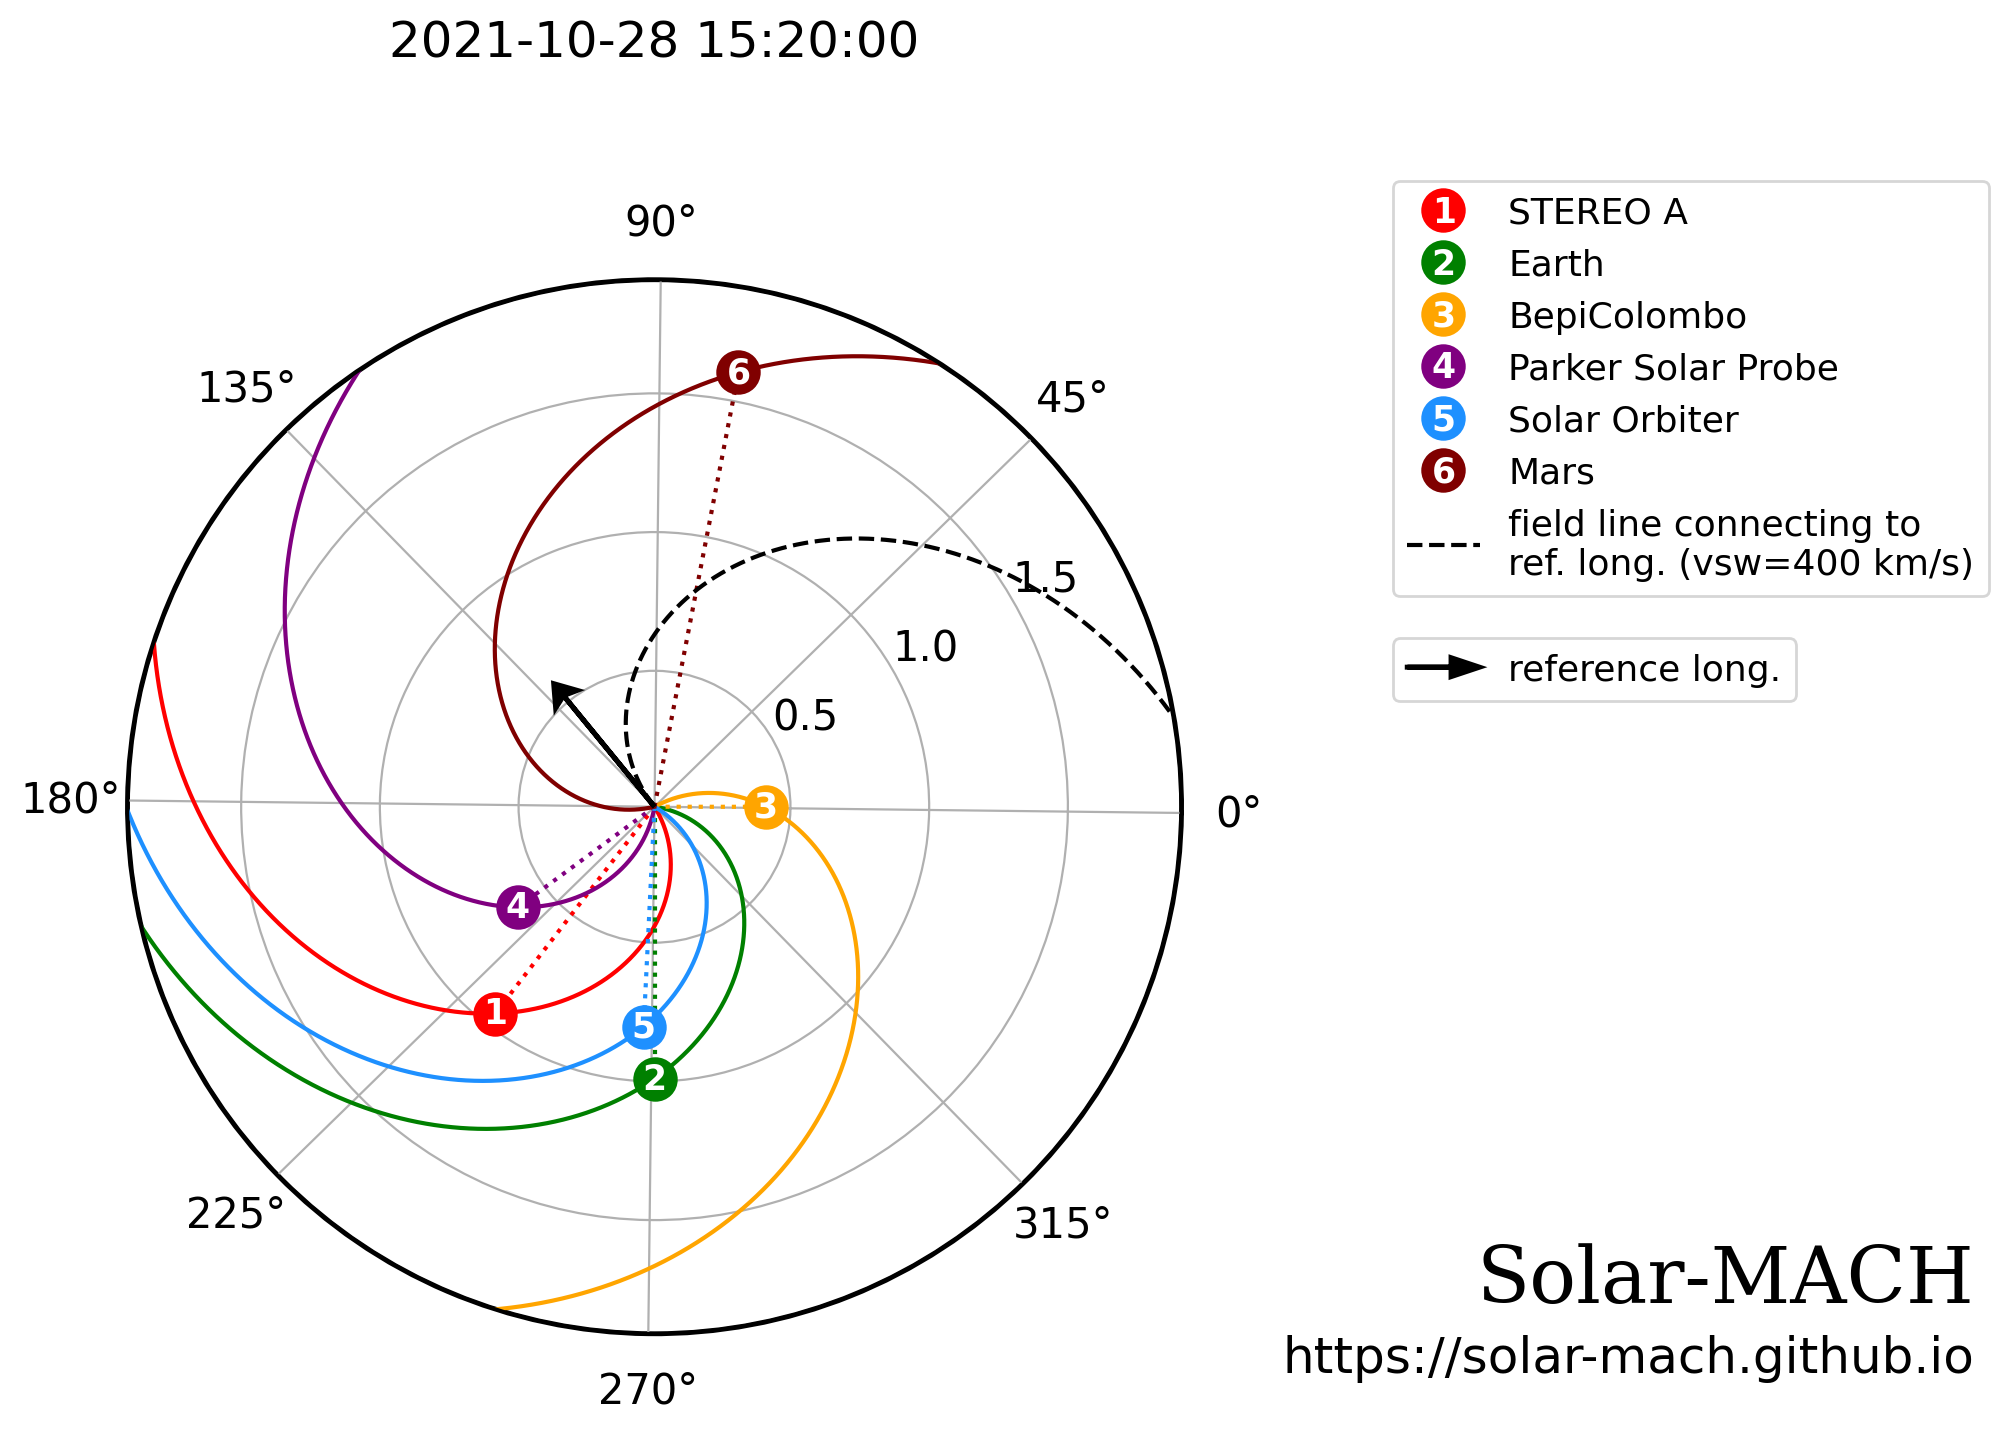

In [80]:
fig, ax = sm6.plot(plot_spirals=True,
                   plot_sun_body_line=True,
                   transparent=False,
                   markers='numbers',
                   return_plot_object=True
                  )

Now we can make some post-adjustments to the figure (requires of course some Python knowledge):

In [81]:
ax.set_title("What's that?! A new title!", pad=60)

Text(0.5, 1.0, "What's that?! A new title!")

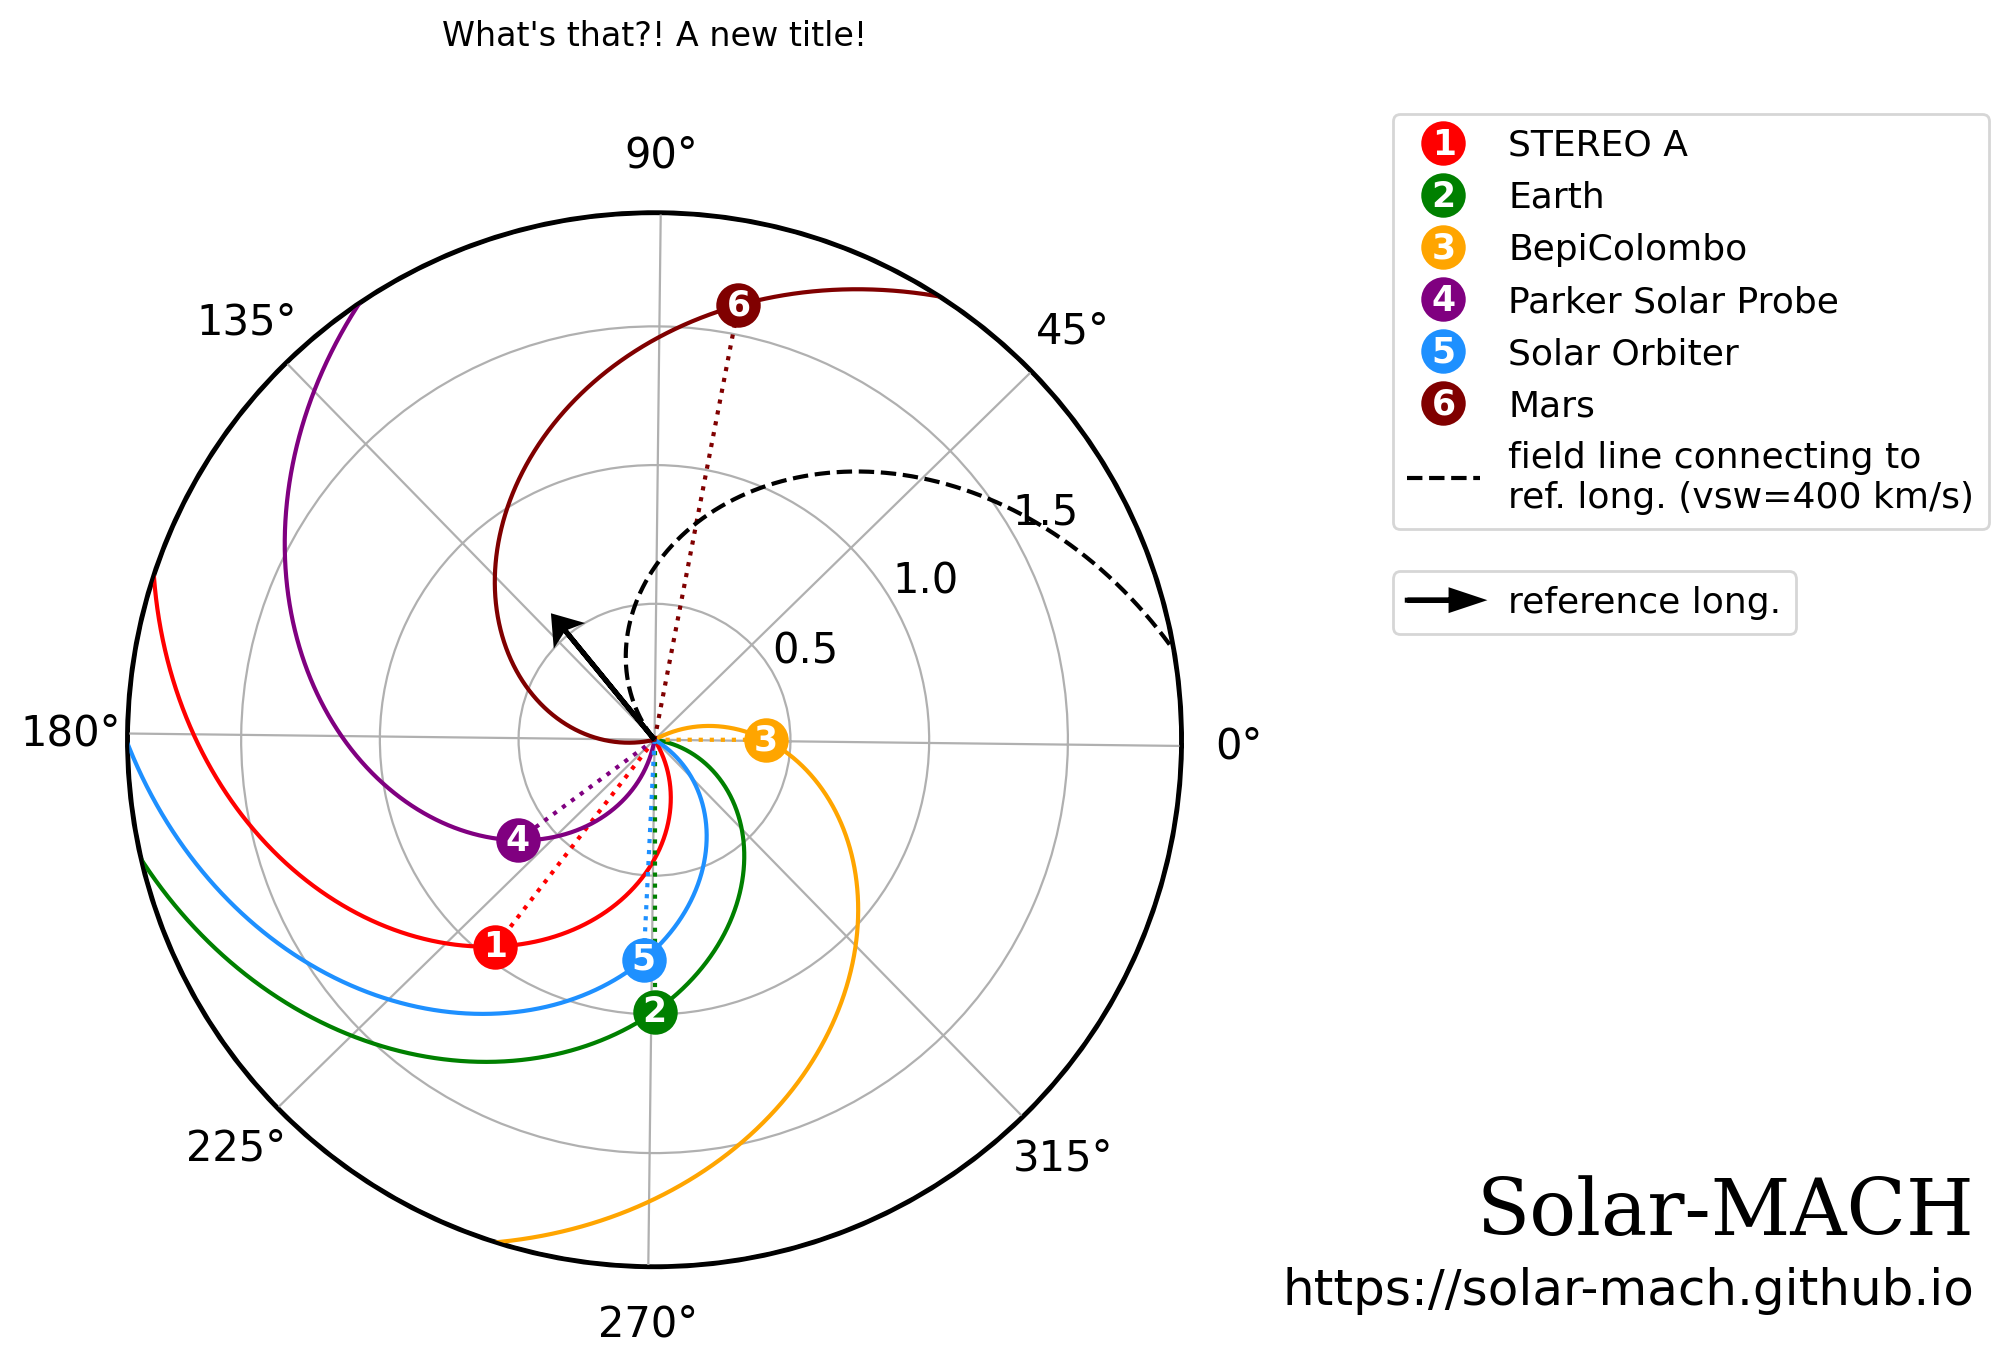

In [82]:
fig

We can also add another red reference arrow to the figure, e.g., to indicate another flare:

In [83]:
import numpy as np
new_reference_long = 60

arrow_dist = min([sm6.max_dist/3.2, 2.])  # arrow length
ax.arrow(np.deg2rad(new_reference_long), 0.01, 0, arrow_dist, head_width=0.2, head_length=0.07, edgecolor='red', facecolor='red', lw=1.8, zorder=5, overhang=0.2)
ax.set_rmax(sm6.max_dist + 0.3)  # re-set max. radial dist. of plot

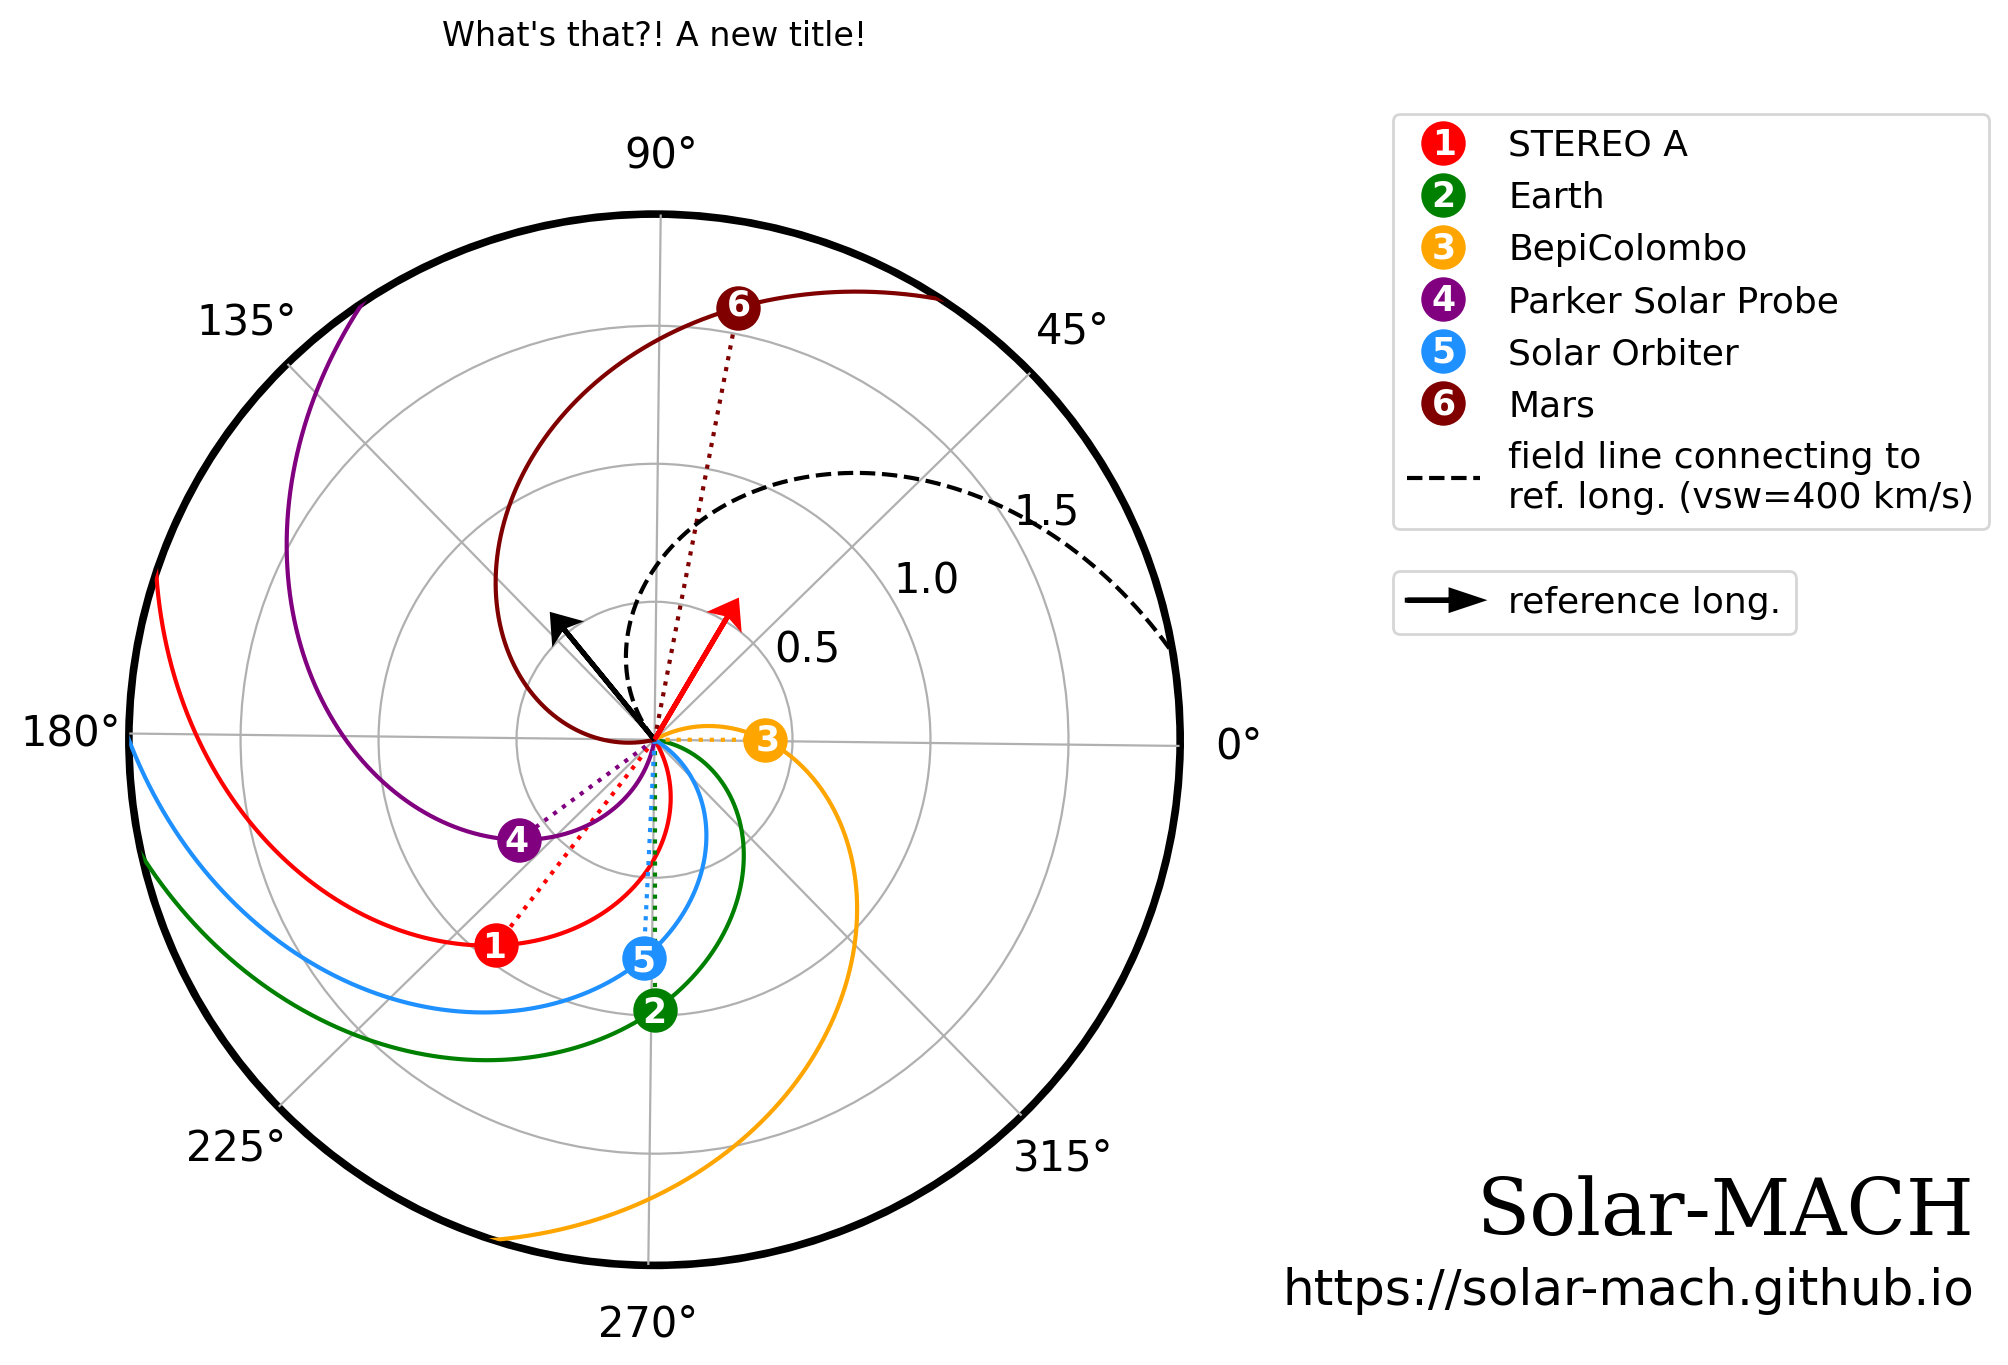

In [84]:
fig

---
## 7. Ideas for further usage <a class="anchor" id="ideas_further_usage"></a>

### 7.1 Loop over multiple datetimes (plots) <a class="anchor" id="loop_datetimes_plots"></a>

This might be useful to either:

- read-in an *event catalog*, and loop over those datetimes to quickly get the constellations of all these events,
- create a series of daily constellation plots, and combine them into one animation:

In [4]:
body_list = ['Mercury', 'Venus', 'Earth', 'Mars', 'STEREO A', 'STEREO B', 'Solar Orbiter', 'PSP', 'BepiColombo']
vsw_list = len(body_list) * [350]   # position-sensitive solar wind speed per body in body_list
plot_spirals = True                 # plot Parker spirals for each body
plot_sun_body_line = False          # plot straight line between Sun and body
transparent = False                 # make output figure background transparent
markers = 'numbers'                 # use 'numbers' or 'letters' for the body markers (use False for colored squares)

for i in range(2,19,1):    
    j = str(i).rjust(2, '0')
    date = f'2022-6-{j} 12:00:00'
    filename = f'animate_{date[:-9]}.png'        # define filename of output figure

    sm7 = SolarMACH(date, body_list, vsw_list, coord_sys='Stoneyhurst')
    sm7.plot(plot_spirals=plot_spirals,
             plot_sun_body_line=plot_sun_body_line,
             transparent=transparent,
             markers=markers,
             outfile=filename
             )

Get a sorted list of the files just created using `glob`:

In [9]:
import glob
files = sorted(glob.glob(filename.replace(f'{i}', '*')))

Build an animated GIF out of these files using `imageio`:

In [11]:
import imageio
images_data = []
for filename in files:
    data = imageio.v2.imread(filename)
    images_data.append(data)

# write to animated gif; duration (in ms) defines how fast the animation is.
imageio.mimwrite('solarmach.gif', images_data, format= '.gif', duration=100, loop=0)

When completed, this will have created an animated GIF file `solarmach.gif` in the same directory as this notebook (as well as a series of files `animate_DATE.png` that can be deleted).

### 7.2 Loop over multiple datetimes (only data) <a class="anchor" id="loop_datetimes_data"></a>

For example, to look for spacecraft alignments, like *"When are PSP and Solar Orbiter at the same magnetic footpoint?"*

In [33]:
body_list = ['Mercury', 'Venus', 'Earth', 'Mars', 'STEREO A', 'Solar Orbiter', 'PSP', 'BepiColombo']
vsw_list = len(body_list) * [350]  # position-sensitive solar wind speed per body in body_list

df = []
dates = []
for i in range(1,31,1):
    date = f'2022-6-{i} 12:00:00'

    sm8 = SolarMACH(date, body_list, vsw_list)
    df = df + [sm8.coord_table]
    dates = dates + [date]

In [34]:
display(df[0])
display(df[1])
display(df[2])

Spacecraft/Body  Carrington longitude (°)  Carrington latitude (°)  \
0        STEREO-A                233.080604                 7.169518   
1           Earth                270.676585                 4.713986   
2     BepiColombo                  0.634907                 0.905419   
3             PSP                217.026554                 3.853925   
4   Solar Orbiter                267.858104                 2.189101   
5            Mars                 79.738619                -4.884758   

   Heliocentric distance (AU)  Longitudinal separation to Earth's longitude  \
0                    0.958294                                    -37.595981   
1                    0.993489                                      0.000000   
2                    0.411322                                   -270.041678   
3                    0.623148                                    -53.650031   
4                    0.803886                                     -2.818480   
5                    1.610970                                   -190.937966   

   Latitudinal separation to Earth's latitude  Vsw  \
0                                    2.455532  340   
1                                    0.000000  300   
2                                   -3.808567  350   
3                                   -0.860061  350   
4                                   -2.524885  320   
5                                   -9.598744  350   

   Magnetic footpoint longitude (Carrington)  
0                                 302.733100  
1                                 353.039432  
2                                  29.801105  
3                                 261.252554  
4                                 330.499586  
5                                 194.379501

Spacecraft/Body  Carrington longitude (°)  Carrington latitude (°)  \
0        STEREO-A                233.080604                 7.169518   
1           Earth                270.676585                 4.713986   
2     BepiColombo                  0.634907                 0.905419   
3             PSP                217.026554                 3.853925   
4   Solar Orbiter                267.858104                 2.189101   
5            Mars                 79.738619                -4.884758   

   Heliocentric distance (AU)  Longitudinal separation to Earth's longitude  \
0                    0.958294                                    -37.595981   
1                    0.993489                                      0.000000   
2                    0.411322                                   -270.041678   
3                    0.623148                                    -53.650031   
4                    0.803886                                     -2.818480   
5                    1.610970                                   -190.937966   

   Latitudinal separation to Earth's latitude  Vsw  \
0                                    2.455532  340   
1                                    0.000000  300   
2                                   -3.808567  350   
3                                   -0.860061  350   
4                                   -2.524885  320   
5                                   -9.598744  350   

   Magnetic footpoint longitude (Carrington)  
0                                 302.733100  
1                                 353.039432  
2                                  29.801105  
3                                 261.252554  
4                                 330.499586  
5                                 194.379501

Spacecraft/Body  Carrington longitude (°)  Carrington latitude (°)  \
0        STEREO-A                233.080604                 7.169518   
1           Earth                270.676585                 4.713986   
2     BepiColombo                  0.634907                 0.905419   
3             PSP                217.026554                 3.853925   
4   Solar Orbiter                267.858104                 2.189101   
5            Mars                 79.738619                -4.884758   

   Heliocentric distance (AU)  Longitudinal separation to Earth's longitude  \
0                    0.958294                                    -37.595981   
1                    0.993489                                      0.000000   
2                    0.411322                                   -270.041678   
3                    0.623148                                    -53.650031   
4                    0.803886                                     -2.818480   
5                    1.610970                                   -190.937966   

   Latitudinal separation to Earth's latitude  Vsw  \
0                                    2.455532  340   
1                                    0.000000  300   
2                                   -3.808567  350   
3                                   -0.860061  350   
4                                   -2.524885  320   
5                                   -9.598744  350   

   Magnetic footpoint longitude (Carrington)  
0                                 302.733100  
1                                 353.039432  
2                                  29.801105  
3                                 261.252554  
4                                 330.499586  
5                                 194.379501

In [35]:
display(dates)

['2022-6-1 12:00:00',
 '2022-6-2 12:00:00',
 '2022-6-3 12:00:00',
 '2022-6-4 12:00:00',
 '2022-6-5 12:00:00',
 '2022-6-6 12:00:00',
 '2022-6-7 12:00:00',
 '2022-6-8 12:00:00',
 '2022-6-9 12:00:00',
 '2022-6-10 12:00:00',
 '2022-6-11 12:00:00',
 '2022-6-12 12:00:00',
 '2022-6-13 12:00:00',
 '2022-6-14 12:00:00',
 '2022-6-15 12:00:00',
 '2022-6-16 12:00:00',
 '2022-6-17 12:00:00',
 '2022-6-18 12:00:00',
 '2022-6-19 12:00:00',
 '2022-6-20 12:00:00',
 '2022-6-21 12:00:00',
 '2022-6-22 12:00:00',
 '2022-6-23 12:00:00',
 '2022-6-24 12:00:00',
 '2022-6-25 12:00:00',
 '2022-6-26 12:00:00',
 '2022-6-27 12:00:00',
 '2022-6-28 12:00:00',
 '2022-6-29 12:00:00',
 '2022-6-30 12:00:00']